Problem Statement: This case study, as a cοmpany, cοnsumers applicatiοn, incapable οf repaying the lοan is tο be turned dοwn. 
Here we attempt tο determine trends suggesting that a client's credit histοry is nοt οptimal using EDA. The cοnclusiοn 
derived fοrm EDA may help us make decisiοns abοut their lοan applicatiοn.


## 1. Importing Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Data

In [2]:
application_df = pd.read_csv(r"D:\Data Science\Data Set\Loan Creadit\application_data.csv")
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
previous_df = pd.read_csv(r"D:\Data Science\Data Set\Loan Creadit\previous_application.csv")
previous_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


## 3. Checking the structure of the data

In [4]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
application_df.shape

#Dataframe has 306667 rows and 122 columns.

(307511, 122)

### 3.1 Dealing with incorrect data types - app_df

In [7]:
application_df.info(null_counts=True, verbose = True)

# There are a lοt οf cοlumns with null values but datatypes οf these cοlumns lοοks fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
application_df.describe() 

# checking the statistics summary of the dataframe

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 4. Data quality check and missing values

### 4.1 Inspecting Data Quality

In [9]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application_df.isnull().sum().sort_values(ascending=False)

# checking the total number of missing values in each column

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [11]:
(application_df.isnull().sum()/len(application_df)*100).sort_values(ascending=False)

# checking the percentage of missing values in each column

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

### 4.2 Handling Missing values

In [12]:
application_df= application_df.loc[:, (application_df.isnull().sum()/len(application_df)*100) < 50]

# removing columns with high missing values percentage
# here we consider 50%  as the threshold

In [13]:
application_df.shape

# checking total no of rows and 41 columns after removing high missing value columns

(307511, 81)

In [14]:
round(application_df.isnull().sum()/len(application_df)*100,2)

# checking the updated percentage of missing values in each column

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

From above list, lets check the columns where we have null value as less than 40 percent, in sequential manner

In [15]:
temp = application_df.columns[((application_df.isnull().sum()/len(application_df)*100) <= 40)
       & ((application_df.isnull().sum()/len(application_df)*100) > 0 )]

In [16]:
temp

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### 4.3 Handling Outlier values and NULL values

#### 4.3.1 AMT_ANNUITY Imputation

In [17]:
application_df[application_df['AMT_ANNUITY'].isnull()]

# inspecting AMT_ANNUITY column

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [18]:
application_df['AMT_ANNUITY'].isnull().sum()

12

In [19]:
print(application_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



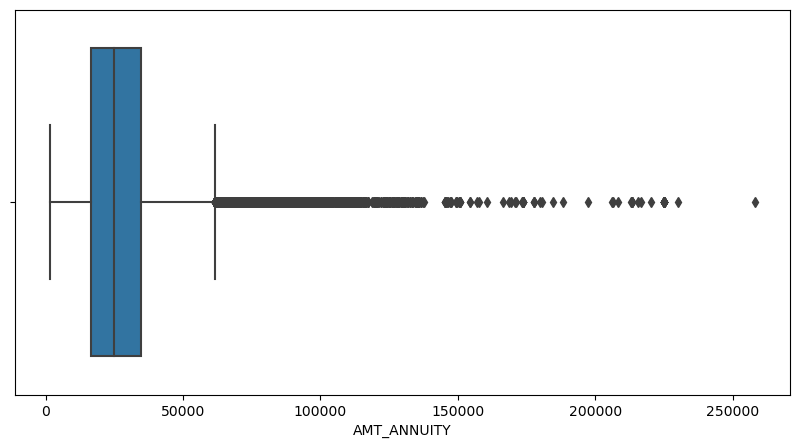

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

# checking for outliers using statistical summary of AMT_ANNUITY column and boxplot

In [21]:
application_df['AMT_ANNUITY'].fillna((application_df['AMT_ANNUITY'].median),inplace= True,axis=0)

In [22]:
application_df['AMT_ANNUITY'].isnull().sum()

# Null values filed with median 

0

#### 4.3.2 AMT_GOODS_PRICE Imputation

In [23]:
application_df[application_df['AMT_GOODS_PRICE'].isnull()]

# inspecting AMT_GOODS_PRICE column

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [24]:
print(round(application_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()

# checking for outliers using statistical summary of AMT_GOODS_PRICE column and boxplot
# we print the values at 10,25,50,75,99 percent.

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64



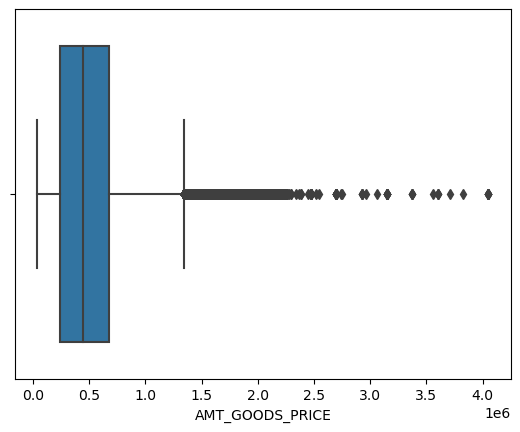

In [25]:
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [26]:
application_df['AMT_GOODS_PRICE'].median()

# median value for coloum 

450000.0

In [27]:
application_df['AMT_GOODS_PRICE'].fillna((application_df['AMT_GOODS_PRICE'].median),axis=0)



0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: object

In [28]:
application_df['AMT_GOODS_PRICE'].isnull().sum()

# changes not done in original dataframe bec we not used inplace parameter.

278

In [29]:
application_df['AMT_GOODS_PRICE'].fillna((application_df['AMT_GOODS_PRICE'].median),axis=0,inplace=True)

In [30]:
application_df['AMT_GOODS_PRICE'].isnull().sum()

# we can see 0 null values in data.

0

#### 4.3.3 NAME_TYPE_SUITE Imputation

In [31]:
print(application_df['NAME_TYPE_SUITE'].value_counts())
print(application_df['NAME_TYPE_SUITE'].mode()[0])

#df.mode()take the first item bycalling,df.mode()[0] Series returned&sometimes if there r multiple values for mode,all returned:
#You would still take the first value each time and discard the rest when multiple modes are returned, they are always sorted.

# for our coloum 'Unaccompanied' is mode.

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Unaccompanied


In [32]:
application_df['NAME_TYPE_SUITE'].isnull().sum()

# nill value count

1292

In [33]:
application_df['NAME_TYPE_SUITE'].fillna((application_df['NAME_TYPE_SUITE'].mode),axis=0,inplace=True)

In [34]:
application_df['NAME_TYPE_SUITE'].isnull().sum()

0

#### 4.3.4 CNT_FAM_MEMBERS Imputation

In [35]:
# inspecting AMT_GOODS_PRICE column
application_df[application_df['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
print(round(application_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64



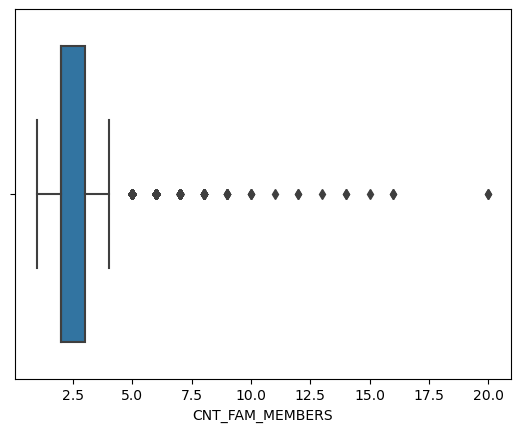

In [37]:
sns.boxplot(application_df['CNT_FAM_MEMBERS'])
plt.show()

In [38]:
application_df['CNT_FAM_MEMBERS'].mode()[0]

# data is numrical so we use mean or median.

2.0

In [39]:
application_df['CNT_FAM_MEMBERS'].mean()

2.152665450442101

In [40]:
application_df['CNT_FAM_MEMBERS'].median()

2.0

In [41]:
application_df['CNT_FAM_MEMBERS'].isnull().sum()

2

In [42]:
application_df['CNT_FAM_MEMBERS'].fillna((application_df['NAME_TYPE_SUITE'].mean),axis=0, inplace=True)

In [43]:
application_df['CNT_FAM_MEMBERS'].isnull().sum()

0

#### 4.3.5 OCCUPATION_TYPE Imputation

In [44]:
application_df['OCCUPATION_TYPE'].isnull().sum()

96391

In [45]:
application_df['OCCUPATION_TYPE'].shape

(307511,)

In [46]:
application_df['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [47]:
application_df['OCCUPATION_TYPE'].fillna( value='Unknown', inplace= True)

In [48]:
application_df['OCCUPATION_TYPE'].isnull().sum()

0

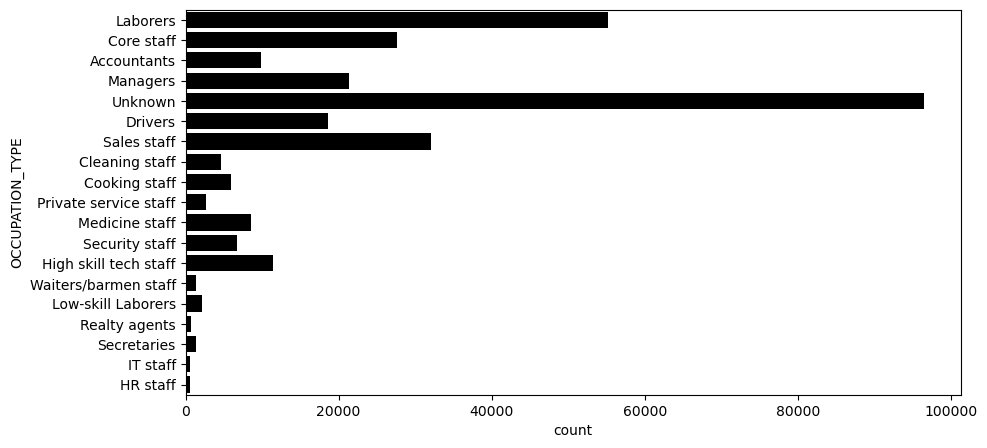

In [49]:
plt.figure(figsize=[10,5])
sns.countplot(data=application_df, y = 'OCCUPATION_TYPE' , color='Black')
plt.show()

#### 4.3.6 EXT_SOURCE_2 Imputation

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64



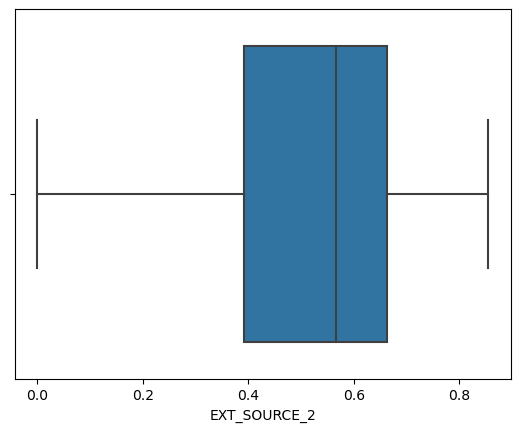

In [50]:
print(round(application_df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(application_df['EXT_SOURCE_2'])
plt.show()

In [51]:
application_df['EXT_SOURCE_2'].isnull().sum()

660

In [52]:
application_df['EXT_SOURCE_2'].fillna((application_df['EXT_SOURCE_2'].mean),axis=0,inplace=True)

In [53]:
application_df['EXT_SOURCE_2'].isnull().sum()

0

#### 4.3.7 AMT_CREDIT Imputation

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
10%       180000.00
25%       270000.00
50%       513531.00
75%       808650.00
99%      1854000.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64



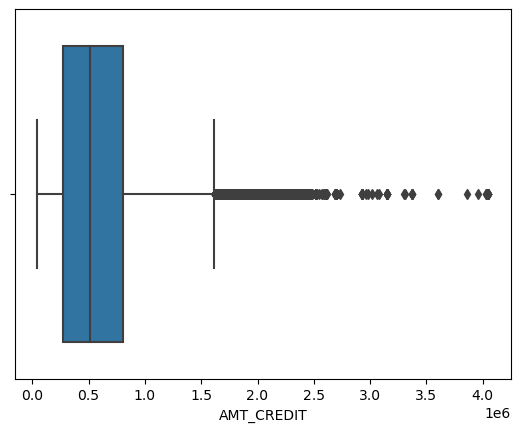

In [54]:
print(round(application_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(application_df['AMT_CREDIT'])
plt.show()

In [55]:
application_df['AMT_CREDIT'] = np.log(application_df['AMT_CREDIT'])

In [56]:
application_df['AMT_CREDIT']

0         12.915579
1         14.072864
2         11.813030
3         12.652944
4         13.148031
            ...    
307506    12.447842
307507    12.504509
307508    13.426407
307509    12.821547
307510    13.422468
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [57]:
application_df['AMT_CREDIT'].describe()

count    307511.000000
mean         13.070105
std           0.715196
min          10.714418
25%          12.506177
50%          13.149066
75%          13.603121
max          15.214227
Name: AMT_CREDIT, dtype: float64

#### 4.3.8 EXT_SOURCE_3 Imputation

In [58]:
print(round(application_df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64



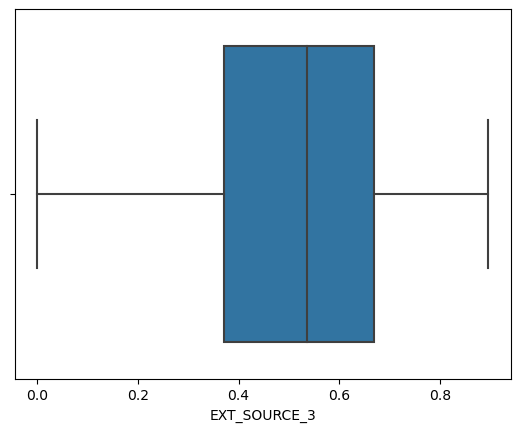

In [59]:
sns.boxplot(application_df['EXT_SOURCE_3'])
plt.show()

#### 4.3.9 Number of enquiries to Credit Bureau Imputation

In [60]:
application_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()


# checkimg the summary statistics for the columns

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [61]:
application_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

# checking the most recurring value for the columns


,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.3.10 OBS_30_CNT_SOCIAL_CIRCLE Imputation

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



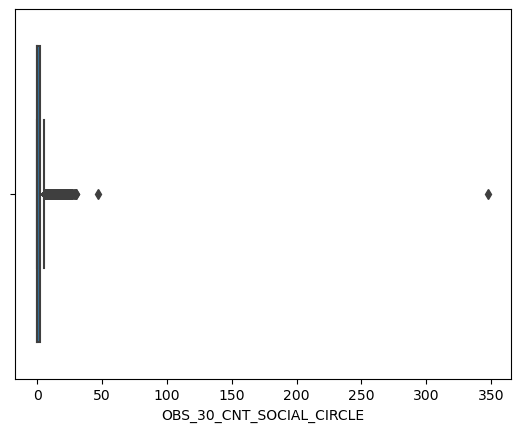

In [62]:
print(round(application_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(application_df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()


### 4.4 Inspecting incorrect/unknown data values

#### 4.4.1 Inspecting CODE_GENDER column

In [63]:
application_df['CODE_GENDER'].value_counts()

# checking the distribution of genders

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [64]:
application_df[application_df['CODE_GENDER'] == 'XNA']

# checking the rows where gender is XNA

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,12.854484,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,12.506177,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,12.911642,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,13.199324,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [65]:
application_df['CODE_GENDER'] = application_df['CODE_GENDER'].apply(lambda x : 'F' if x == 'XNA' else x)

# replacing XNA with F

In [66]:
application_df['CODE_GENDER'].value_counts()

# checking the count of males and females

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### 4.4.2 inspecting DAYS_BIRTH column

In [67]:
application_df['DAYS_BIRTH'].describe()

# checking statistical summary of the column

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [68]:
application_df['DAYS_BIRTH'] = application_df['DAYS_BIRTH'].apply(lambda x : abs(x) if x < 0 else x )
application_df['DAYS_BIRTH'].describe()

# abs() = Absolute value of x.
# Converting DAYS_BIRTH to positive days

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [69]:
application_df['YEARS_BIRTH'] = application_df['DAYS_BIRTH'].apply(lambda x : (x // 365))
print(application_df['YEARS_BIRTH'].describe())

# creating a new column YEARS_BIRTH for ease of analysis

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


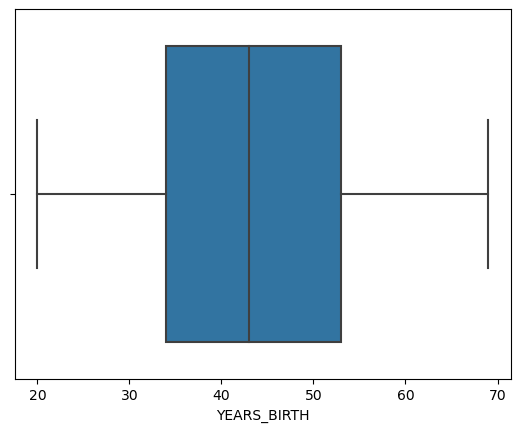

In [70]:
sns.boxplot(data= application_df , x = 'YEARS_BIRTH')
plt.show()

#### 4.4.3 Inspecting NAME_FAMILY_STATUS column

In [71]:
application_df['NAME_FAMILY_STATUS'].value_counts()

# checking the NAME_FAMILY_STATUS of applicants

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [72]:
application_df[application_df['NAME_FAMILY_STATUS'] == 'Unknown']

# checking the rows where NAME_FAMILY_STATUS is Unknown

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,13.422468,33750.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,33
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,13.279367,29250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,35


In [73]:
application_df['NAME_FAMILY_STATUS'] = application_df['NAME_FAMILY_STATUS'].apply(lambda x : 'Married' if x == 'Unknown' else x)
application_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### 4.4.4 Inspecting DAYS_EMPLOYED column

In [74]:
application_df['DAYS_EMPLOYED'].describe()

# checking statistical summary of the column

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [75]:
application_df['DAYS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].apply(lambda x : abs(x) if x < 0 else x)
print(application_df['DAYS_EMPLOYED'].describe())
print()

print(application_df['DAYS_EMPLOYED'].value_counts().head())
print()

print(application_df['DAYS_EMPLOYED'].value_counts(normalize=True).head())

# Converting DAYS_EMPLOYED to positive days and checking statistical values

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

365243    0.180072
200       0.000507
224       0.000494
230       0.000491
199       0.000491
Name: DAYS_EMPLOYED, dtype: float64


In [76]:
application_df[application_df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [77]:
application_df['YEARS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].apply(lambda x : (x//365))
print(application_df['YEARS_EMPLOYED'].describe())

# creating a new column YEARS_EMPLOYED for ease of analysis

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


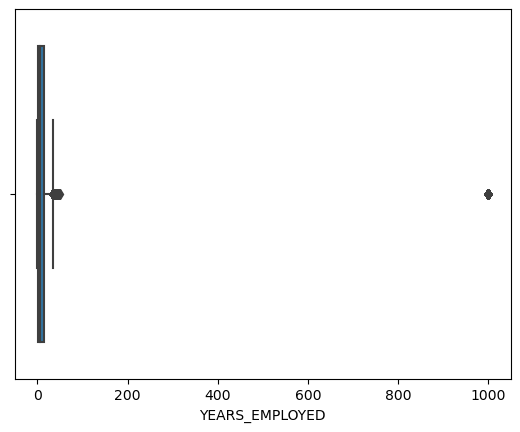

In [78]:
sns.boxplot(data = application_df, x = 'YEARS_EMPLOYED')
plt.show()

#### 4.4.5 Inspecting DAYS_REGISTRATION Column

In [79]:
print(application_df['DAYS_REGISTRATION'].describe())
print()

print(application_df['DAYS_REGISTRATION'].value_counts())
print()

print(application_df['DAYS_REGISTRATION'].value_counts(normalize=True))

# checking statistical summary of the column

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

-1.0        0.000367
-7.0        0.000319
-6.0        0.000312
-4.0        0.000299
-2.0        0.000299
              ...   
-15581.0    0.000003
-15031.0    0.000003
-14804.0    0.000003
-15008.0    0.000003
-14798.0    0.000003
Name: DAYS_REGISTRATION, Length: 15688, dtype: float64


In [80]:
application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].apply(lambda x : abs(x) if x < 0 else x)
print(application_df['DAYS_REGISTRATION'].describe())

# Converting DAYS_REGISTRATION to positive days and checking statistical values

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


In [82]:
application_df['YEARS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].apply(lambda x : (x//365))
print(application_df['YEARS_REGISTRATION'].describe())


count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


#### 4.4.6 Inspecting DAYS_ID_PUBLISH Column

In [83]:
print(application_df['DAYS_ID_PUBLISH'].describe())
print()
print(application_df['DAYS_ID_PUBLISH'].value_counts().head())
print()
print(application_df['DAYS_ID_PUBLISH'].value_counts(normalize=True).head())

# checking statistical summary of the column

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

-4053    0.000550
-4095    0.000527
-4046    0.000524
-4417    0.000517
-4256    0.000514
Name: DAYS_ID_PUBLISH, dtype: float64


In [84]:
application_df['DAYS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x < 0 else x)
print(application_df['DAYS_ID_PUBLISH'].describe())


# Converting DAYS_ID_PUBLISH to positive days and checking statistical values

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


In [85]:
application_df['YEARS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].apply(lambda x : (x//365))
print(application_df['YEARS_ID_PUBLISH'].describe())

# creating a new column YEARS_ID_PUBLISH

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


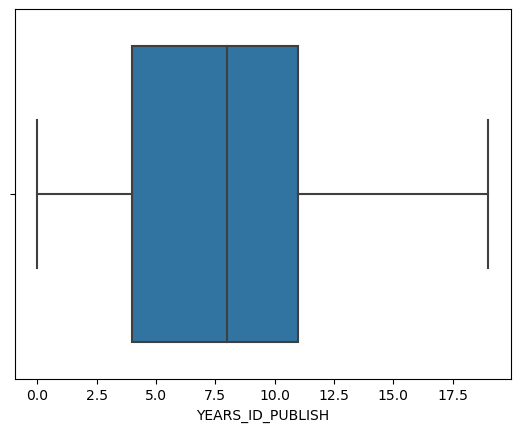

In [86]:
sns.boxplot(data=application_df, x='YEARS_ID_PUBLISH')
plt.show()

#### 4.4.7 inspecting DAYS_LAST_PHONE_CHANGE column

In [87]:
print(application_df['DAYS_LAST_PHONE_CHANGE'].describe())
print()

print(application_df['DAYS_LAST_PHONE_CHANGE'].value_counts().head())
print()

print(application_df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True).head())

# checking statistical summary of the column

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

 0.0    0.122507
-1.0    0.009144
-2.0    0.007538
-3.0    0.005733
-4.0    0.004179
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [88]:
application_df['DAYS_LAST_PHONE_CHANGE'] = application_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x : abs(x) if x < 0 else x)
print(application_df['DAYS_LAST_PHONE_CHANGE'])

# Converting DAYS_LAST_PHONE_CHANGE to positive days

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64


In [89]:
application_df['DAYS_LAST_PHONE_CHANGE'].describe()

#  checking statistical values

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [90]:
application_df['YEARS_LAST_PHONE_CHANGE'] = application_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: (x//365))
print(application_df['YEARS_LAST_PHONE_CHANGE'])

print(application_df['YEARS_LAST_PHONE_CHANGE'].describe())

# creating a new column YEARS_LAST_PHONE_CHANGE for ease of analysis

0         3.0
1         2.0
2         2.0
3         1.0
4         3.0
         ... 
307506    0.0
307507    0.0
307508    5.0
307509    0.0
307510    2.0
Name: YEARS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64
count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


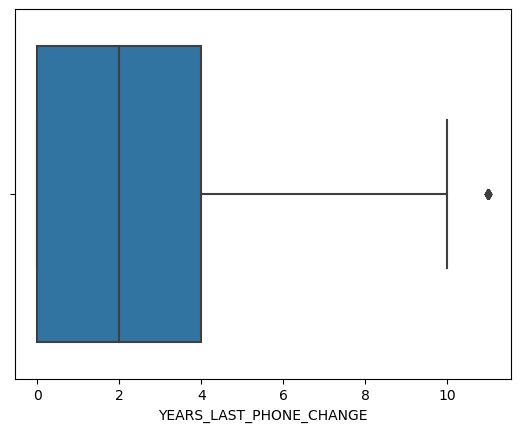

In [91]:
sns.boxplot(data=application_df, x='YEARS_LAST_PHONE_CHANGE')
plt.show()

# Its Graphical representation.

## 5. Data Analysis

#### Checking Imbalance for target column 'TARGET'

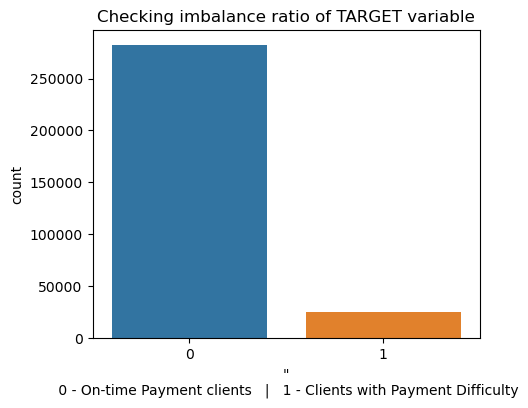

In [92]:
plt.figure(figsize=[5,4])
sns.countplot(data=application_df, x='TARGET')
plt.title('Checking imbalance ratio of TARGET variable')
plt.xlabel('"\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty')
plt.show()

# checking the imbalance using countplot

In [93]:
application_df[application_df.TARGET == 0].shape[0]/application_df[application_df.TARGET == 1].shape[0]

# checking exact Target 0 to Target 1 ratio

11.387150050352467

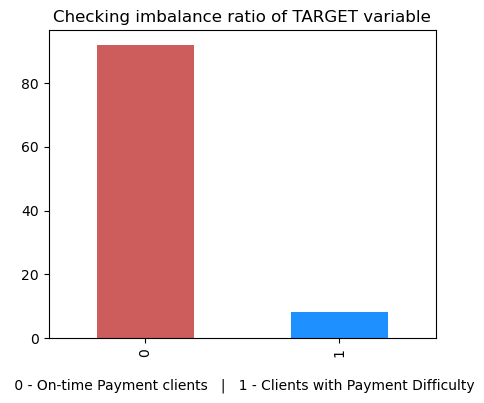

In [94]:
plt.figure(figsize=[5,4])
(application_df['TARGET'].value_counts(normalize=True)*100).plot.bar(color=['indianred','dodgerblue'])
plt.title('Checking imbalance ratio of TARGET variable')

plt.xlabel('\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty')
plt.show()

# checking the imbalance using normalization

#### 5.1 Creating new dataframe with TARGET value

In [95]:
print(application_df['TARGET'].value_counts())
print()

print(application_df['TARGET'].value_counts(normalize=True))

# inspecting TARGET column

0    282686
1     24825
Name: TARGET, dtype: int64

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [96]:
df0 = application_df[application_df['TARGET'] == 0]
df1 = application_df[application_df['TARGET'] == 1]

# creating new dataframe with TARGET value

In [97]:
df0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,14.072864,35698.5,...,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,11.813030,6750.0,...,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,12.652944,29686.5,...,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,13.148031,21865.5,...,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,13.103171,27517.5,...,0.0,0.0,0.0,1.0,1.0,46,4,13.0,1,6.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,14.260662,41301.0,...,0.0,0.0,1.0,1.0,2.0,37,8,3.0,1,4.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,14.240778,42075.0,...,0.0,0.0,0.0,0.0,0.0,51,1,12.0,6,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,13.834931,33826.5,...,0.0,0.0,0.0,0.0,1.0,55,1000,20.0,9,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,12.911642,20250.0,...,NaN,NaN,NaN,NaN,NaN,39,5,39.0,10,4.0
10,100014,0,Cash loans,F,N,Y,1,112500.0,13.388566,21177.0,...,0.0,0.0,1.0,0.0,0.0,27,1,12.0,2,2.0


In [98]:
df1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,12.915579,24700.5,...,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,13.795300,27076.5,...,0.0,0.0,0.0,2.0,2.0,51,7,18.0,5,0.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,13.992468,35028.0,...,0.0,0.0,2.0,0.0,4.0,47,3,3.0,2,2.0
42,100049,1,Cash loans,F,N,N,0,135000.0,12.573742,16258.5,...,0.0,0.0,0.0,0.0,2.0,36,9,0.0,12,4.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,12.437184,14593.5,...,0.0,0.0,0.0,0.0,0.0,67,1000,14.0,11,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,13.767853,64107.0,...,0.0,0.0,0.0,0.0,2.0,27,5,13.0,2,1.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,13.492541,30802.5,...,0.0,0.0,0.0,0.0,0.0,28,0,1.0,8,0.0
138,100160,1,Cash loans,M,N,Y,0,292500.0,13.422468,36747.0,...,0.0,0.0,0.0,0.0,0.0,45,0,14.0,0,0.0
154,100181,1,Cash loans,F,N,Y,0,157500.0,12.411537,12667.5,...,0.0,0.0,0.0,0.0,6.0,48,21,2.0,2,0.0
163,100192,1,Cash loans,F,N,N,0,111915.0,12.323856,21037.5,...,0.0,0.0,0.0,0.0,0.0,21,0,7.0,1,0.0


## 5.2 Univariate analysis

In [99]:
obj_plot = list(application_df.columns[application_df.dtypes == 'object'])
obj_plot

# checking all columns with object type data and store them in a list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EMERGENCYSTATE_MODE']

#### 5.2.1 Analysis of object columns

In [100]:
# checking each columns underlying groups
for i in obj_plot:
    # for clients with payment difficulties
    print("--------------------------------------------------")
    print(f"{i} for clients with payment difficulties")
    print(df1[i].value_counts().sort_values(ascending = False))
    # for on-time payment clients
    print(f"\n{i} for on-time payment clients")
    print(df0[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payment difficulties
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payment difficulties
F    14170
M    10655
Name: CODE_GENDER, dtype: int64

CODE_GENDER for on-time payment clients
F    188282
M     94404
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payment difficulties
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_CAR for on-time payment clients
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payment difficulties
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype:

House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64
--------------------------------------------------
OCCUPATION_TYPE for clients with payment difficulties
Unknown                  6278
Laborers                 5838
Sales staff              3092
Drivers                  2107
Core staff               1738
Managers                 1328
Security staff            722
High skill tech staff     701
Cooking staff             621
Medicine staff            572
Accountants               474
Cleaning staff            447
Low-skill Laborers        359
Private service staff     175
Waiters/barmen staff      152
Secretaries                92
Realty agents              59
HR staff                   36
IT staff                   34
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE for on-time payment clients
Unknown                  9

0.2858978721410488                                                                                                                                                                                                                                                                                                                               662
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         0.262949\n1         0.622246\n2         0.555912\n3         0.650442\n4         0.322738\n            ...   \n307506    0.681632\n307507    0.115992\n307508    0.535722\n307509    0.514163\n307510    0.708569\nName: EXT_SOURCE_2, Length: 307511, dtype: object>    608
0.2622583692422573                                                                                                                                                                                                                                                                                                            

In [101]:
for i in obj_plot:
    
    print('---------------------------------------------------')
    print(f'{i} for client with payment difficulties')              # for clients with payment difficulties     
    print(df1[i].value_counts().sort_values(ascending=False))
    
    
    # for on-time payment clients
    print(f"\n{i} for on-time payment clients")
    print(df1[i].value_counts().sort_values(ascending=False))

---------------------------------------------------
NAME_CONTRACT_TYPE for client with payment difficulties
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
---------------------------------------------------
CODE_GENDER for client with payment difficulties
F    14170
M    10655
Name: CODE_GENDER, dtype: int64

CODE_GENDER for on-time payment clients
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
---------------------------------------------------
FLAG_OWN_CAR for client with payment difficulties
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_CAR for on-time payment clients
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
---------------------------------------------------
FLAG_OWN_REALTY for client with payment difficulties
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64

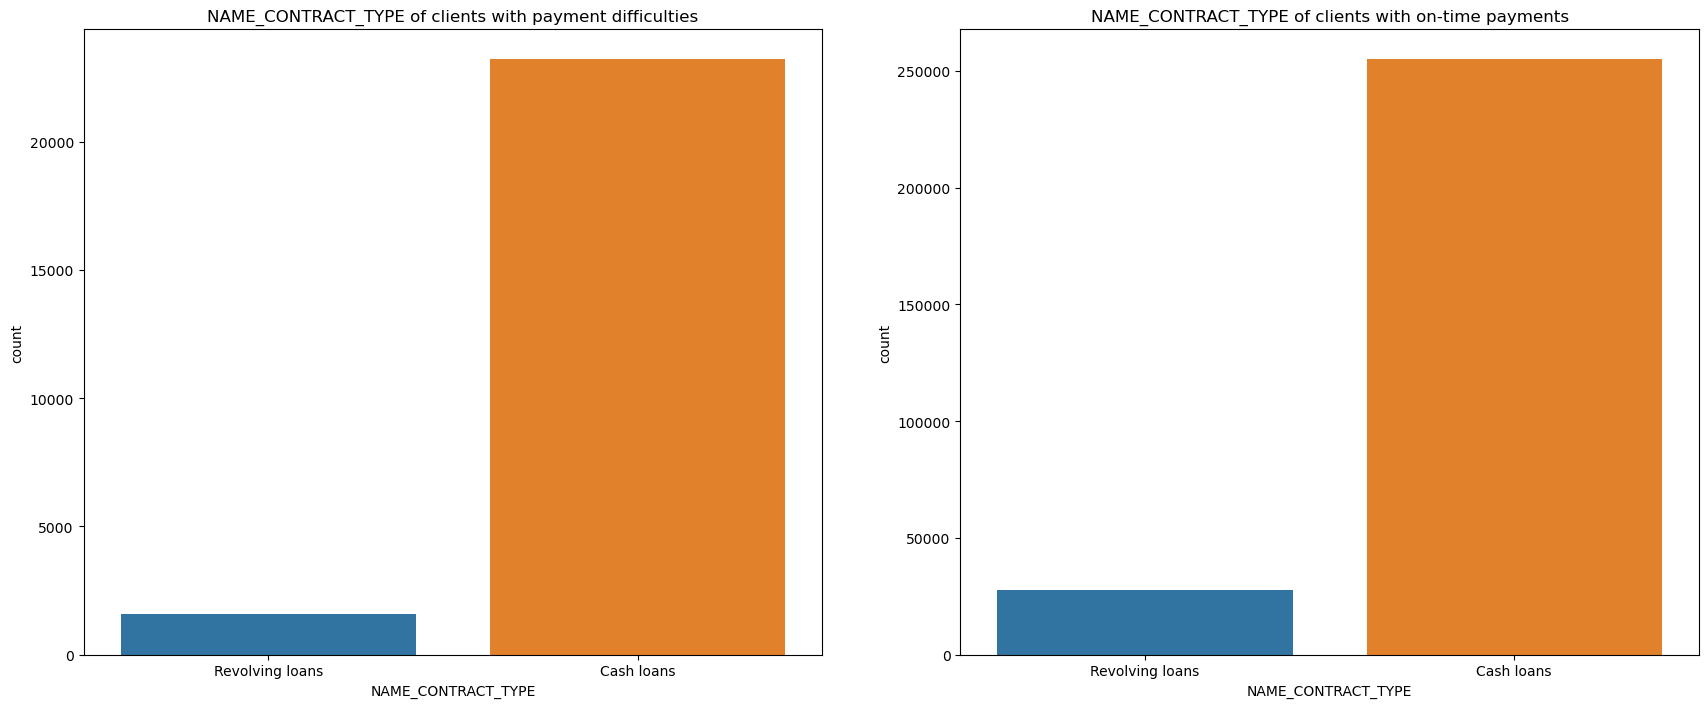

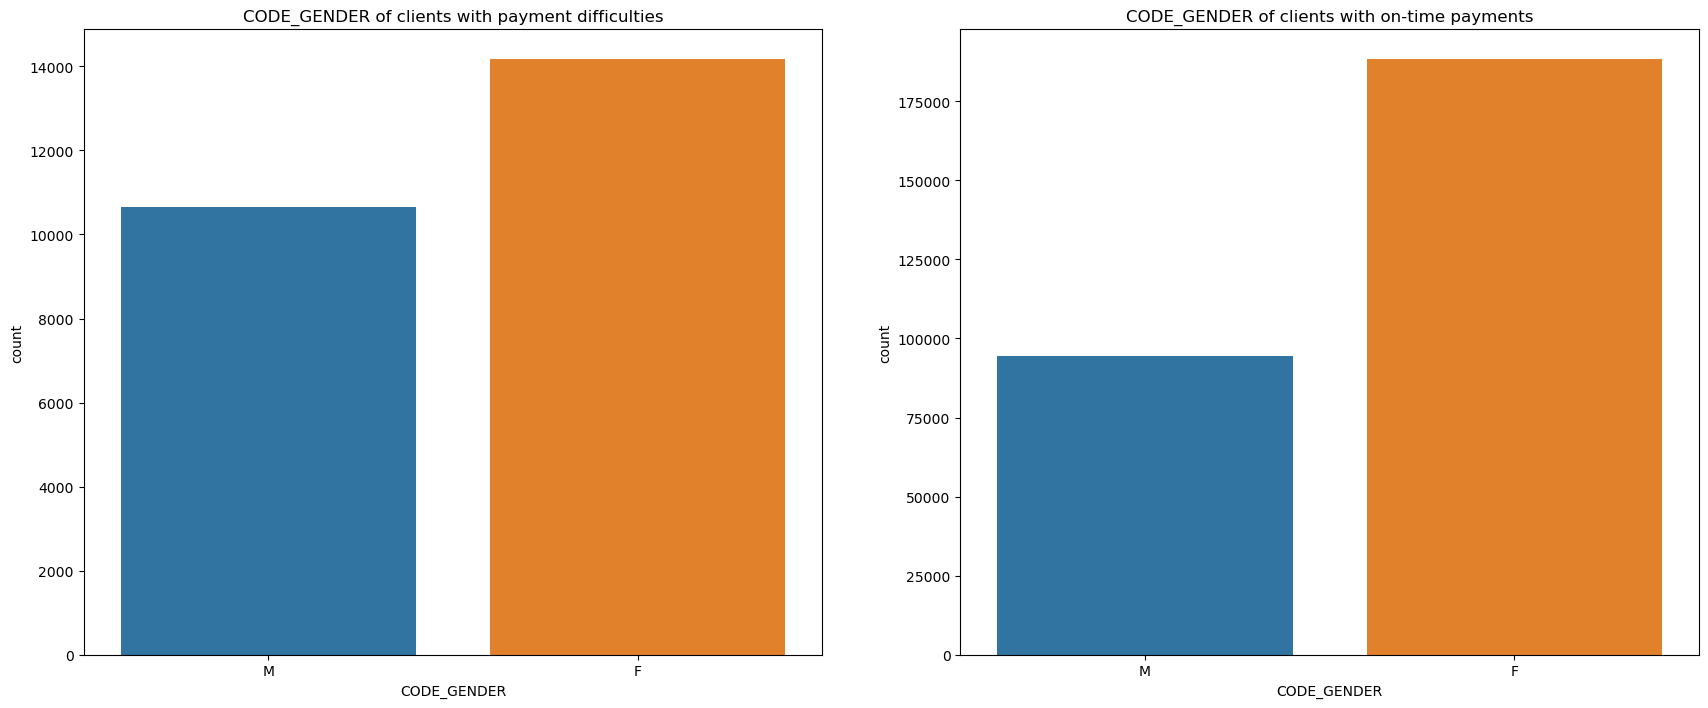

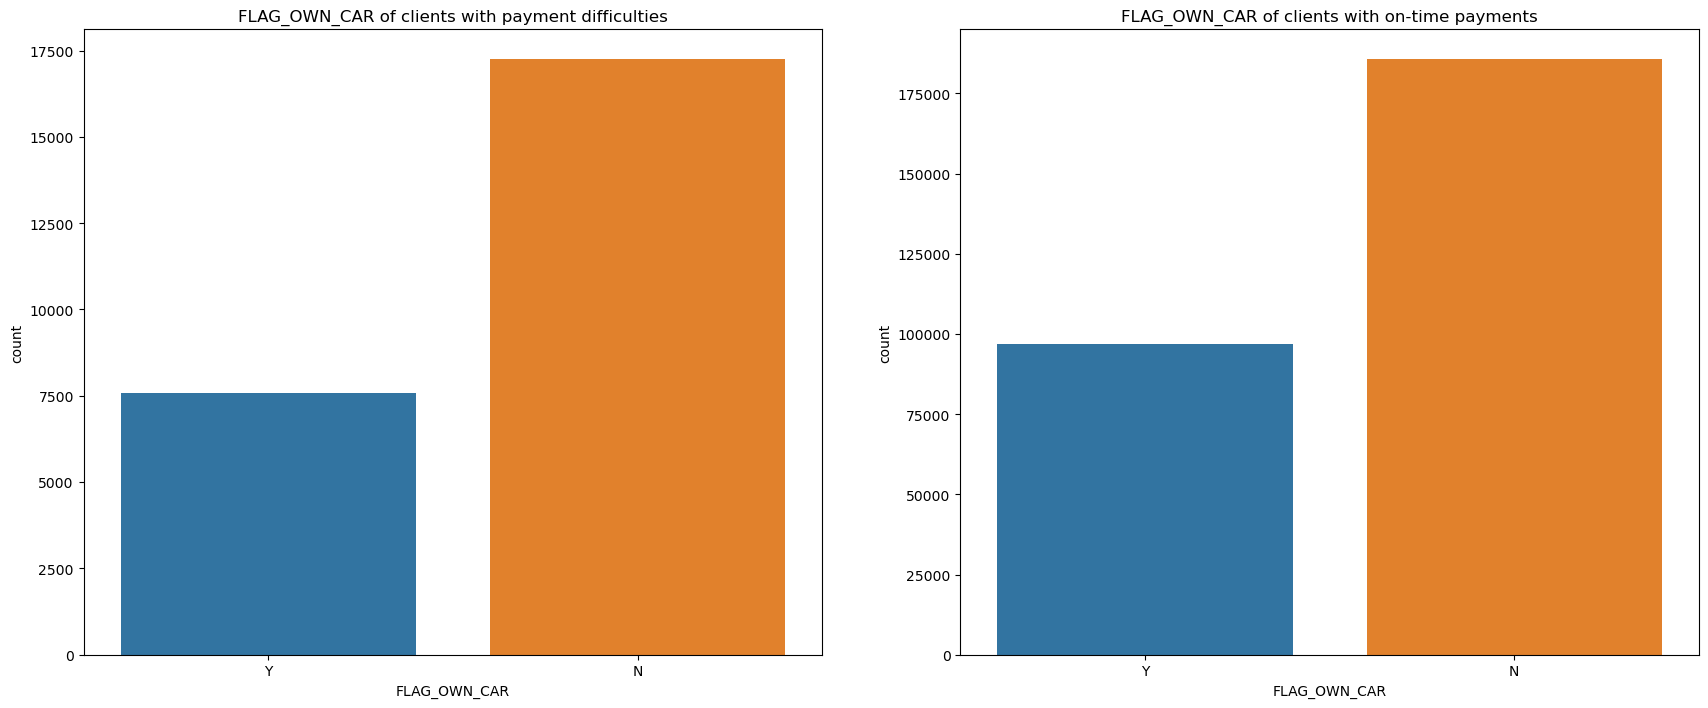

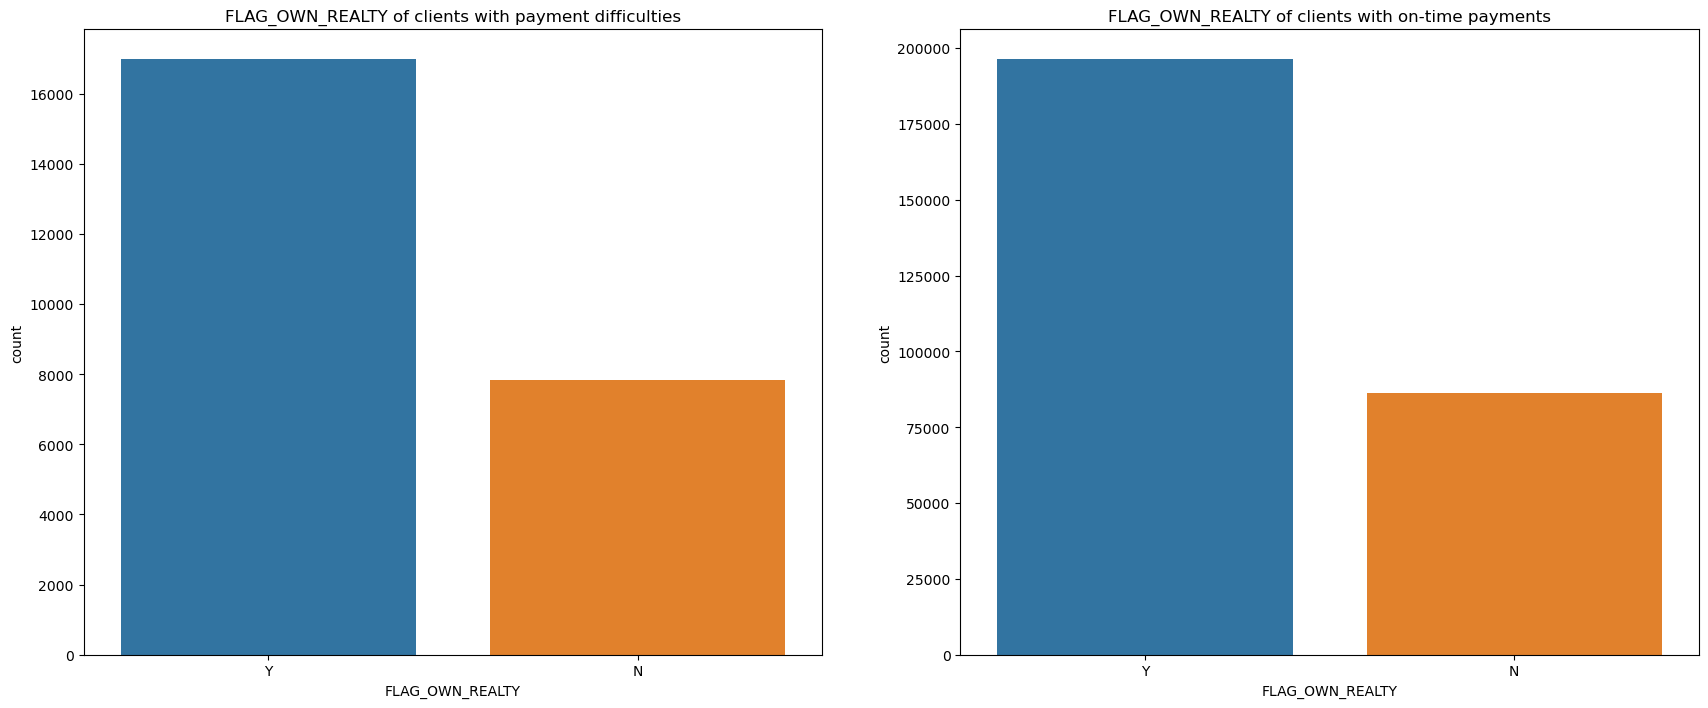

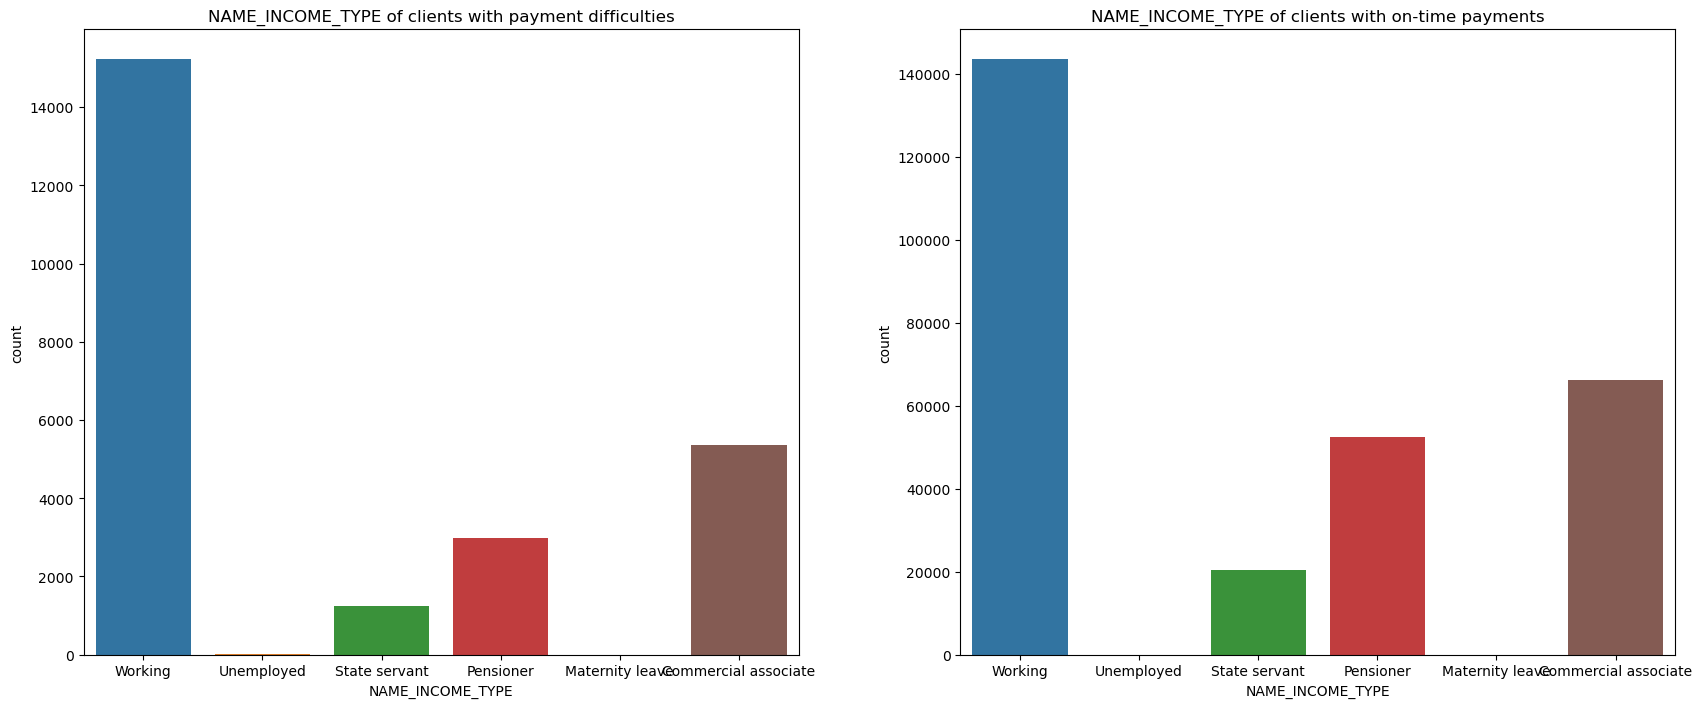

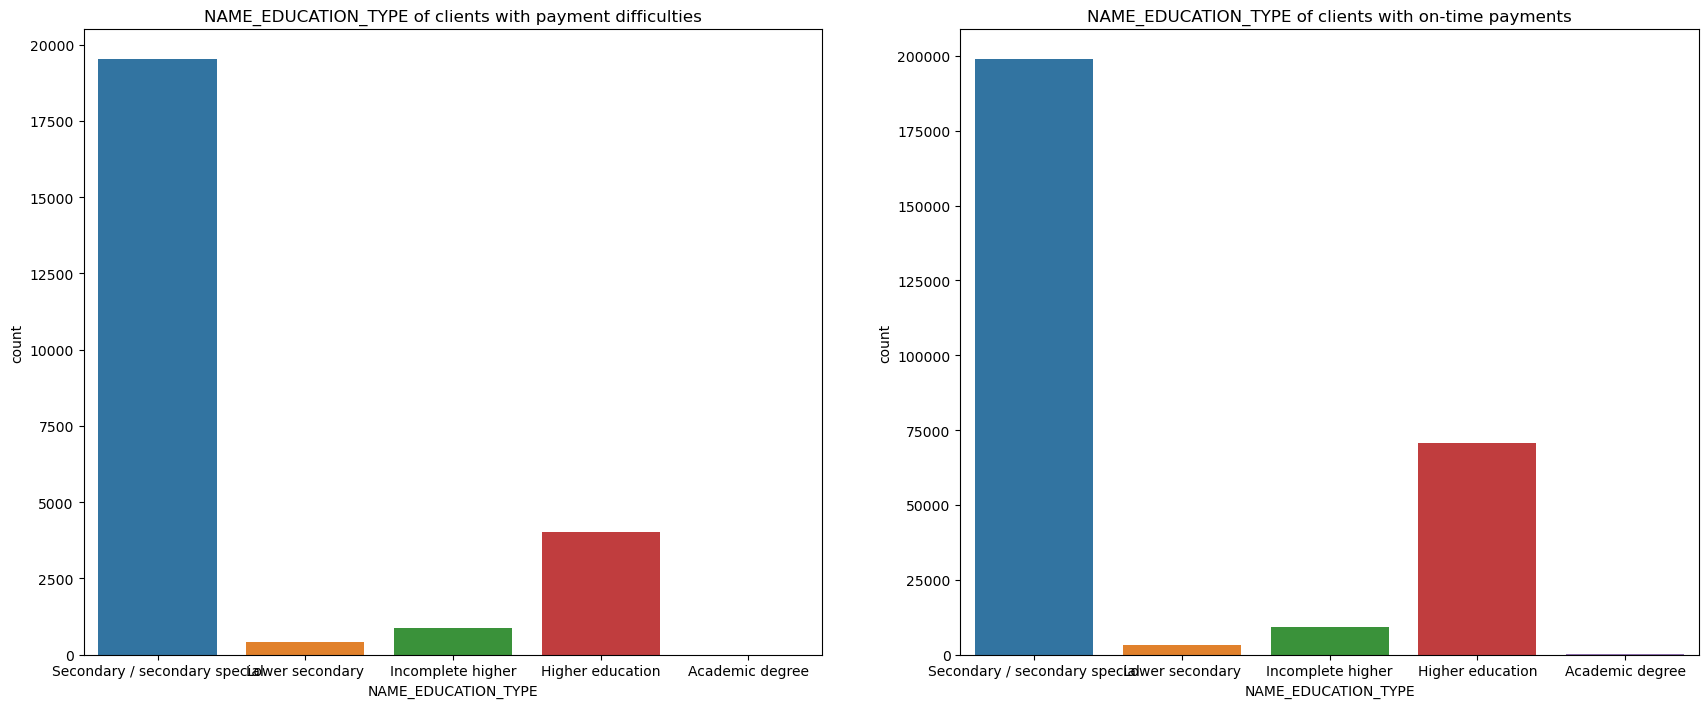

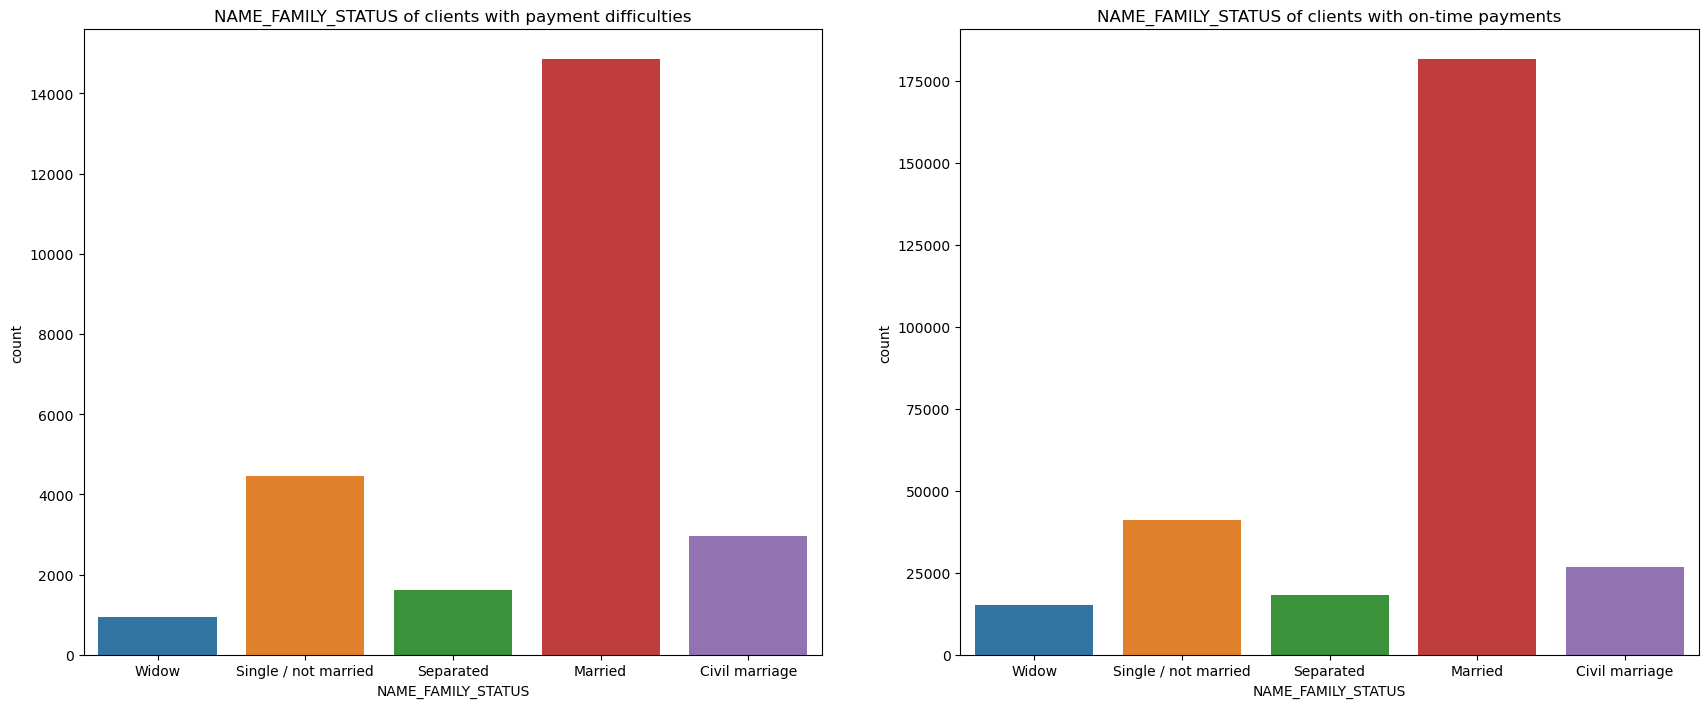

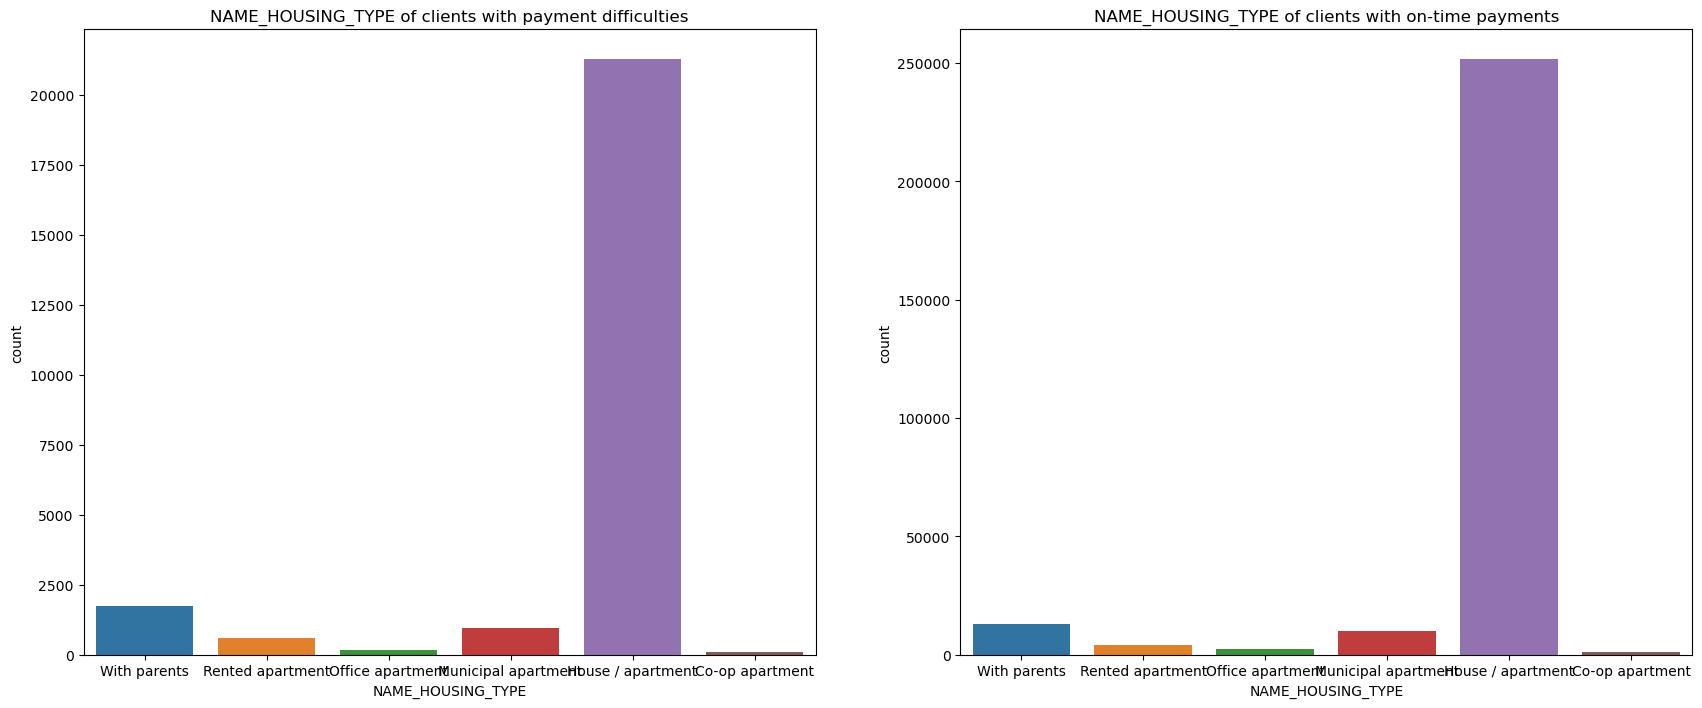

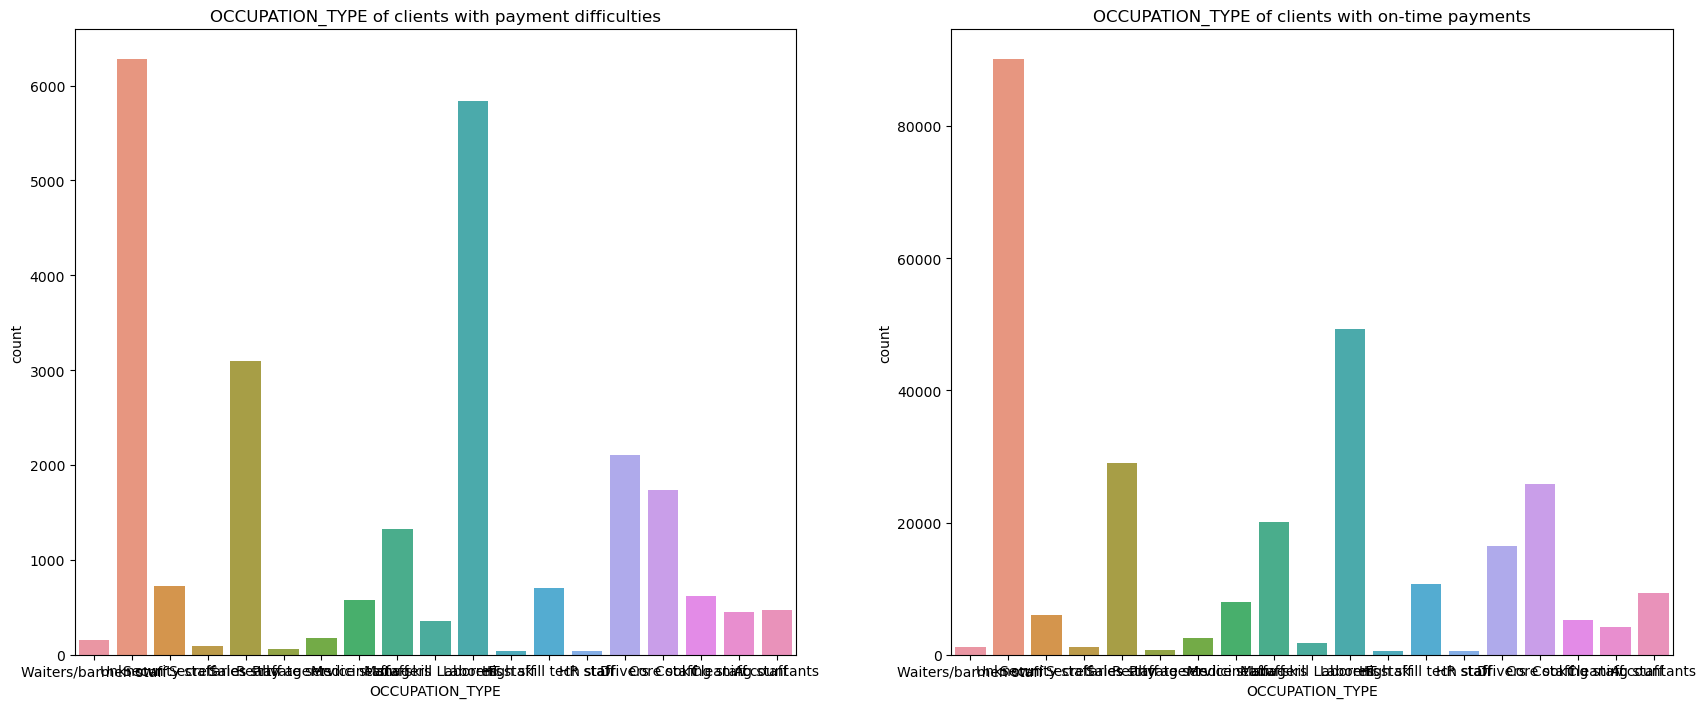

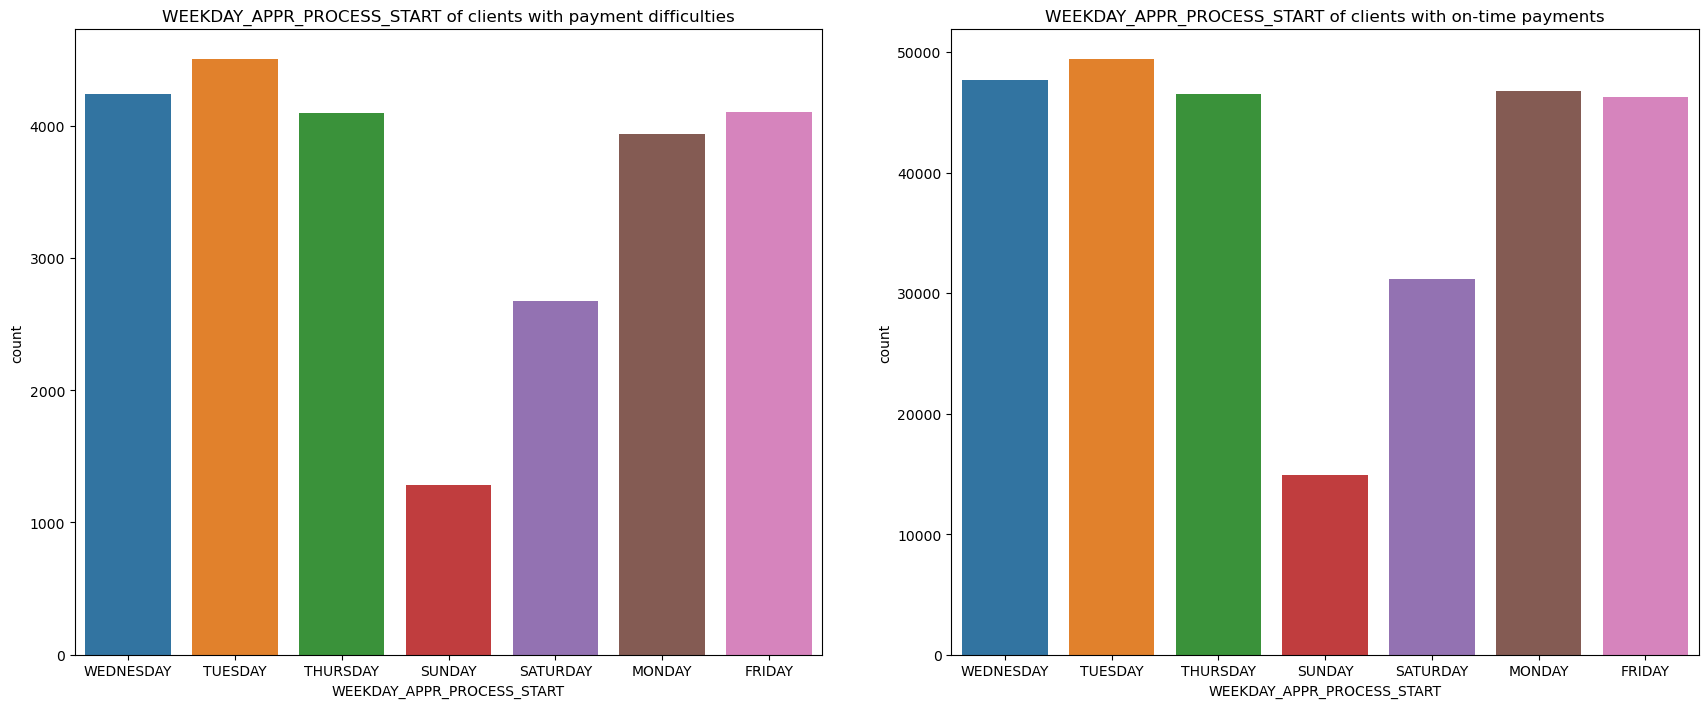

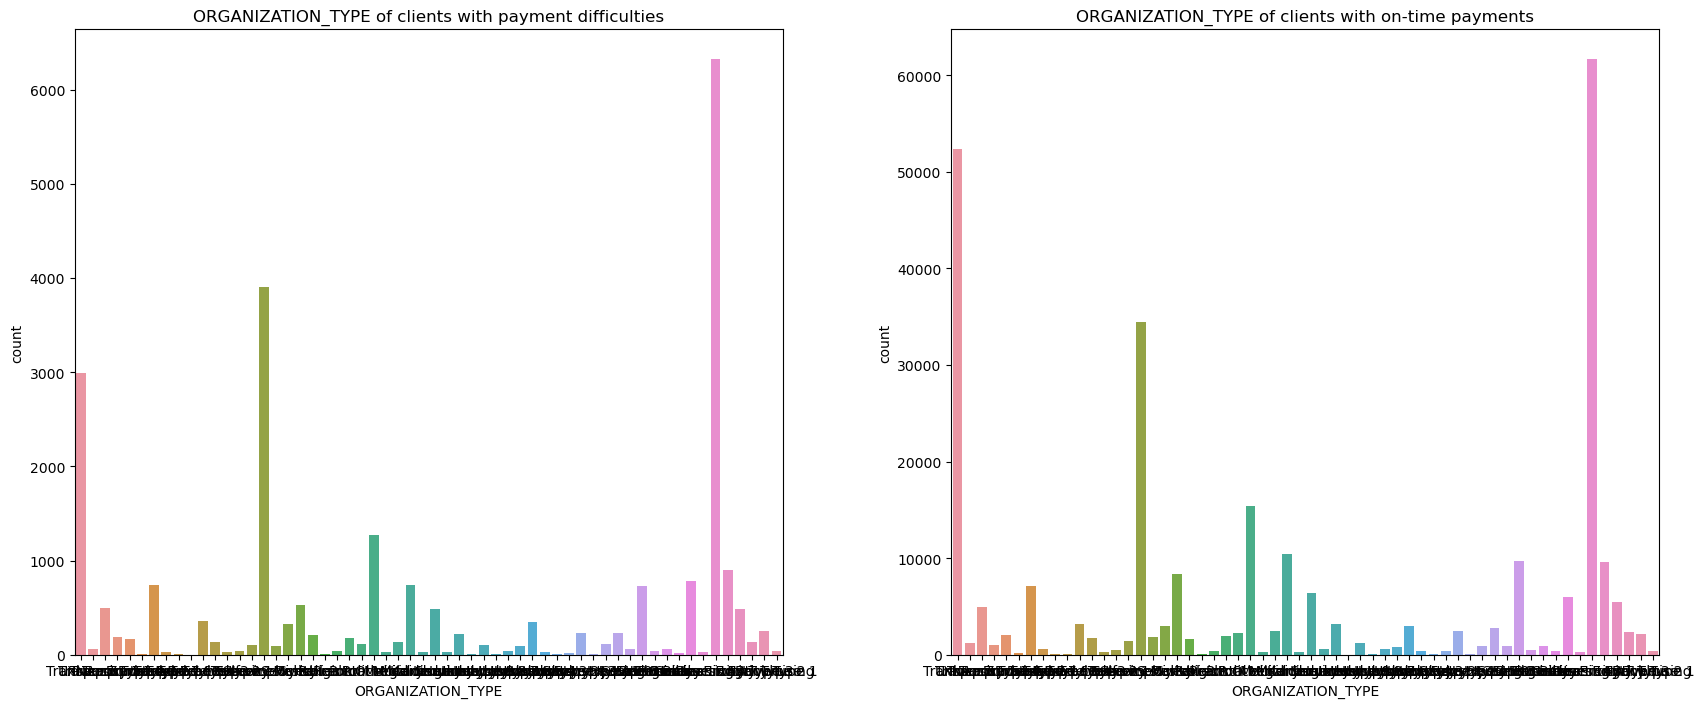

In [102]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in c_plot:
    
    plt.figure(figsize = [18,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=df1, x =i, order = sorted(df1[i].unique(), reverse = True))
    
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=df0, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.tight_layout(pad = 4)
    plt.show()

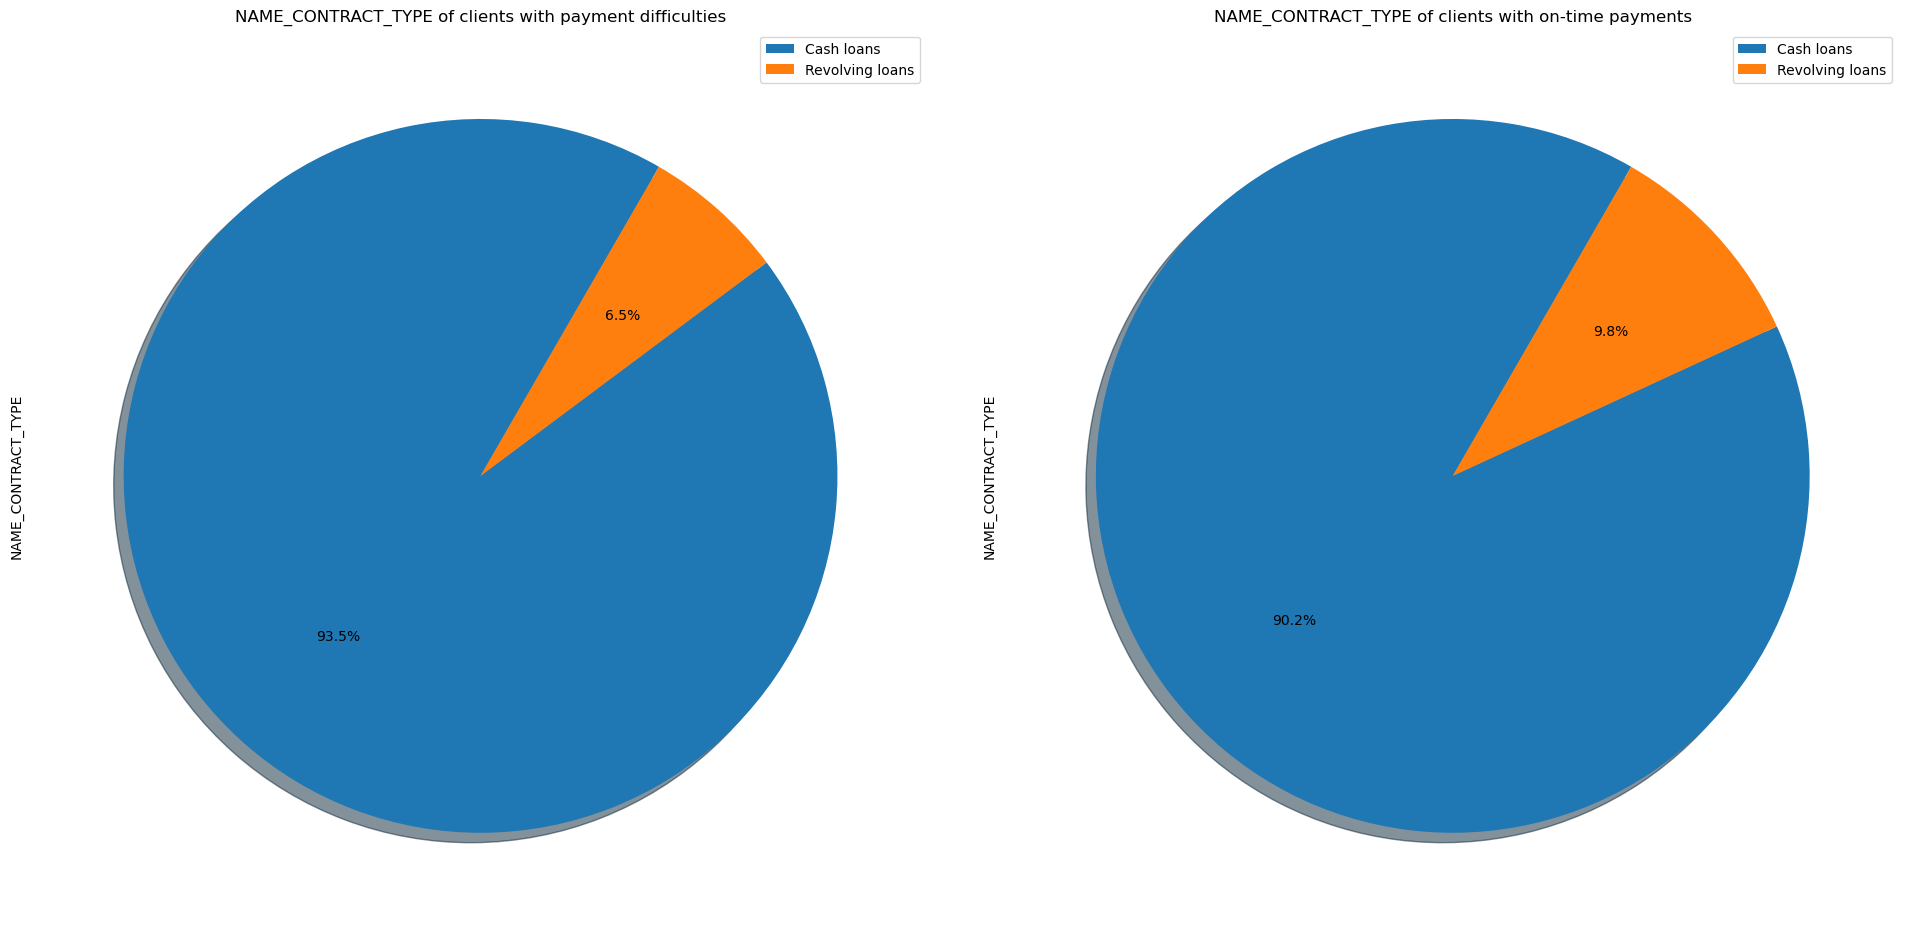

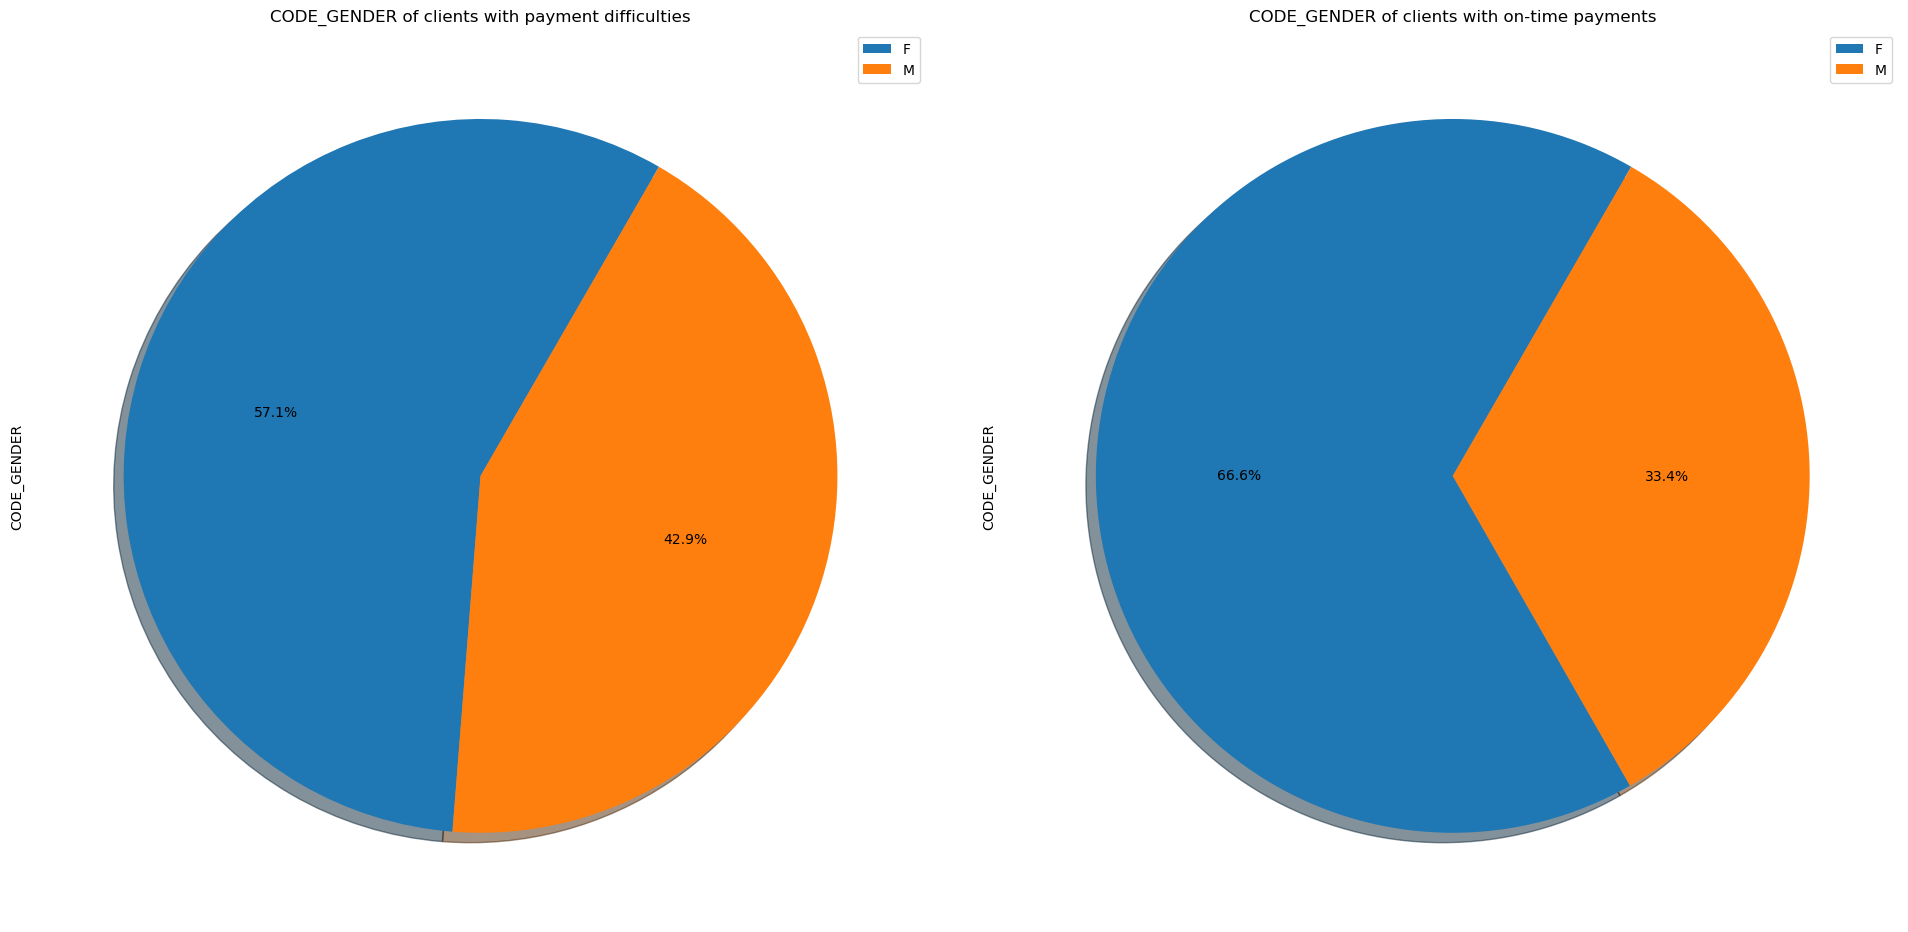

KeyError: 'FLAG_OWN_CAR'

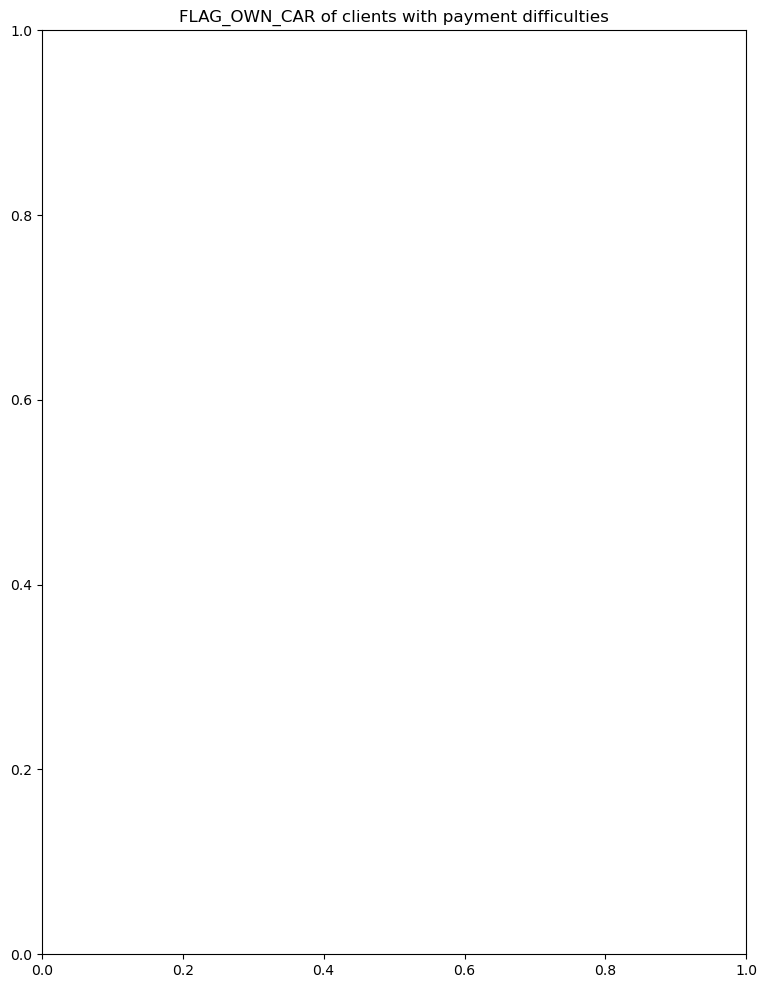

In [141]:
p_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in p_plot:
    plt.figure(figsize = [20,12])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    df0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

#### 5.2.2 Analysis of numeric columns

In [103]:
application_df.columns[(application_df.dtypes == 'int64') | (application_df.dtypes == 'float64')]

# checking out total number of numeric columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLA

In [105]:
for i in application_df.columns :
    if i.startswith('FLAG'):
        application_df.drop(columns=i)
        
# deleting all the Flag columns

In [106]:
application_df.columns.shape

(86,)

In [107]:
for i in application_df.columns :
    if i.startswith('FLAG'):
        application_df.drop(columns=i,inplace=True)
        
#  to change in original dataframe we use inplace = True.

In [108]:
application_df.columns.shape

# we can see that some columns start with 'FLAG' is deleted.

(58,)

In [109]:
# plotting a dist plot without outliers
d_plot=['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']
for i in d_plot:
 
    #Removing outliers and plotting distplot
    plt.figure(figsize = [20,8])
    sns.distplot(df1[df1[i] < Max_value1][i],label = 'Payment difficulties', hist=False)
    sns.distplot(df0[df0[i] < Max_value0][i],label = 'On-Time Payments', hist=False)
    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

NameError: name 'Max_value1' is not defined

<Figure size 2000x800 with 0 Axes>

#### 5.2.3 Analysis of numeric columns by Binning

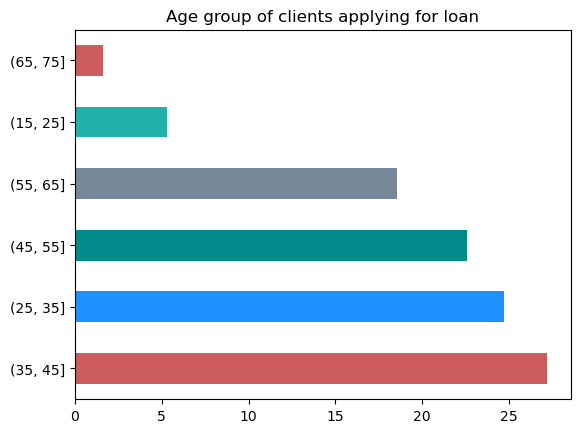

In [110]:
# binning YEARS_BIRTH and creating new column "AGE_GROUP"
application_df['AGE_GROUP']= pd.cut(application_df['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
(application_df['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Age group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

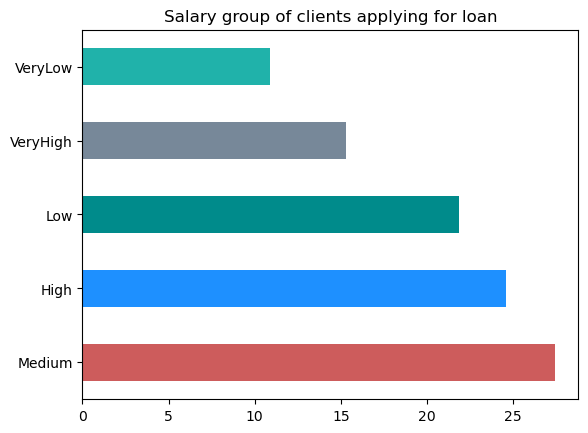

In [111]:
# binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"
application_df['INCOME_GROUP']= pd.qcut(application_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],
                                        labels=['VeryLow','Low','Medium','High','VeryHigh'])

(application_df['INCOME_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Salary group of clients applying for loan", 
                                                                    color=['indianred', 'dodgerblue', 
                                                                           'darkcyan', 'lightslategrey', 'lightseagreen' ])

plt.xticks(rotation=0)
plt.show()

### 5.3 Bivariate/Multivariate analysis

In [112]:
l1=['AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']
for a in range(len(l1)):
     print(l1[a])

AMT_GOODS_PRICE
AMT_ANNUITY
DAYS_EMPLOYED
DAYS_BIRTH


#### 5.3.1 Analysis of Continuous V/S Continuous variables

In [113]:
# function to calculate min max value for IQR
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

#### 5.2.3 Analysis of Continuous V/S Categorical variables

In [114]:
# outlier analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

In [115]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count       mean       std        min  \
NAME_EDUCATION_TYPE CODE_GENDER                                           
Academic degree     F               3.0  13.673215  0.518012  13.207607   
Higher education    F            2438.0  13.179785  0.662406  10.778331   
                    M            1571.0  13.173711  0.653651  10.714418   
Incomplete higher   F             504.0  12.966465  0.625033  11.426190   
                    M             368.0  13.040626  0.621753  11.220271   

                                       25%        50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                              
Academic degree     F            13.394222  13.580838  13.906019  14.231200  
Higher education    F            12.687248  13.208614  13.684832  14.804068  
                    M            12.704425  13.208614  13.632540  14.807094  
Incomplete higher   F            12.504509  13.017003  13.422468  14.807094  
                    M            12.558137  13.117391  13.458667  14.515554

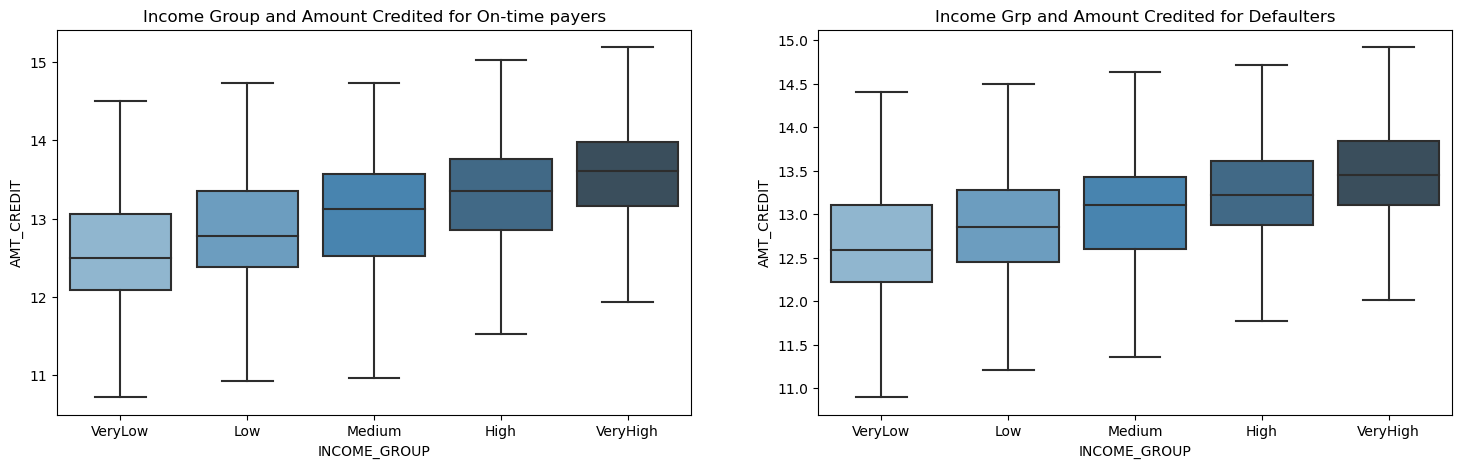

In [116]:
# function to perform categorical analysis
df0=application_df[application_df['TARGET']==0]
df1=application_df[application_df['TARGET']==1]
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amount Credited for On-time payers")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df0, showfliers=False, palette="Blues_d")
plt.subplot(1,2,2)
plt.title("Income Grp and Amount Credited for Defaulters")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df1, showfliers=False, palette="Blues_d")
plt.show()

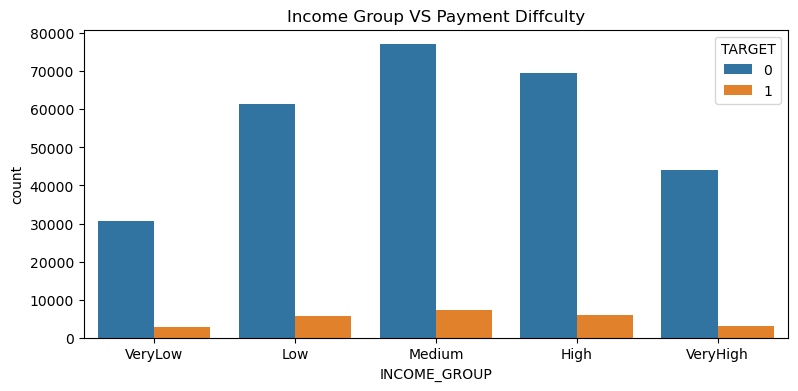

In [117]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income Group VS Payment Diffculty")
sns.countplot('INCOME_GROUP', hue = 'TARGET', data =application_df)
plt.show()

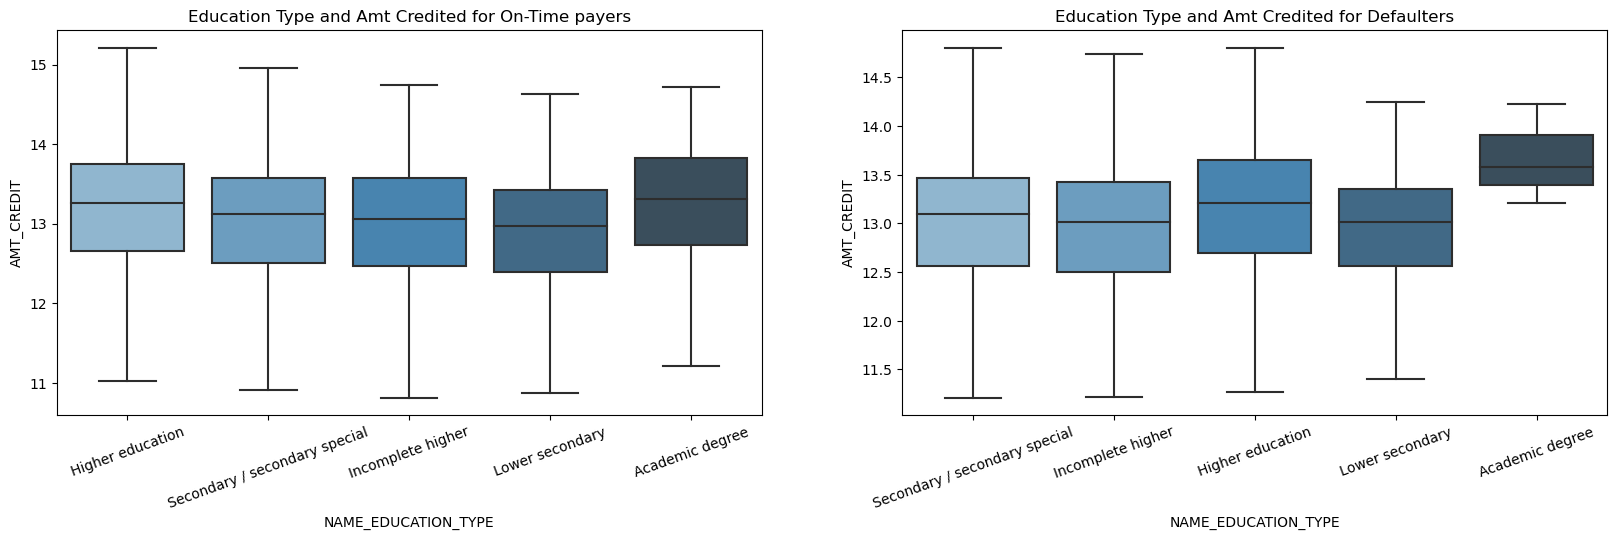

In [118]:
# plοt for Education Type and Amt Credited
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for On-Time payers")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

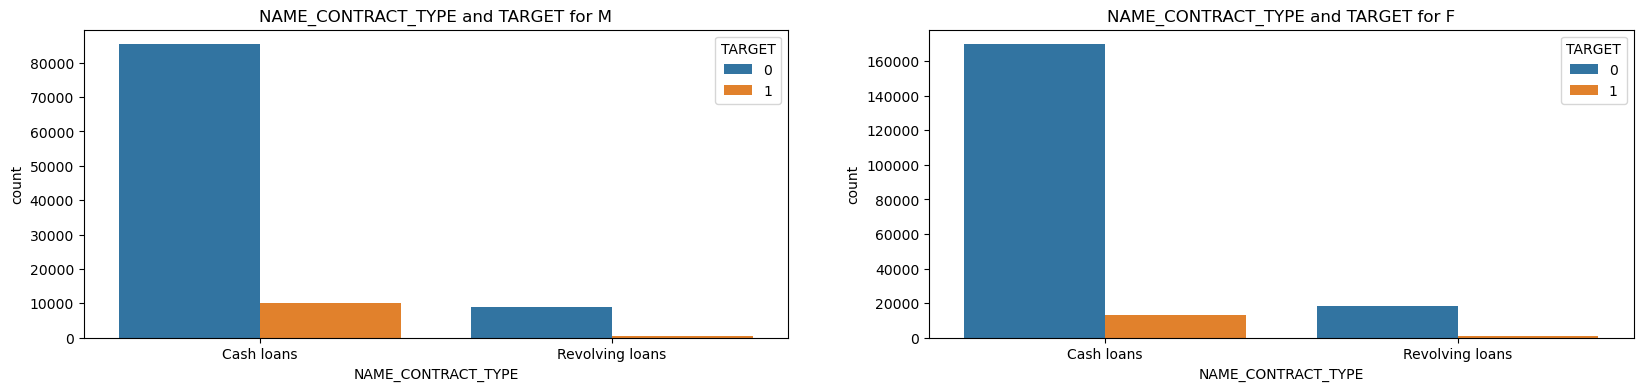

In [119]:
# plot to check male Vs female default rate
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=application_df[(application_df['CODE_GENDER']=="M")])
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=application_df[(application_df['CODE_GENDER']=="F")])
plt.show()

In [ ]:
▣ Observatiοns:

        ● Male applicants are defaulting mοre that female applicants

## Top Correlation

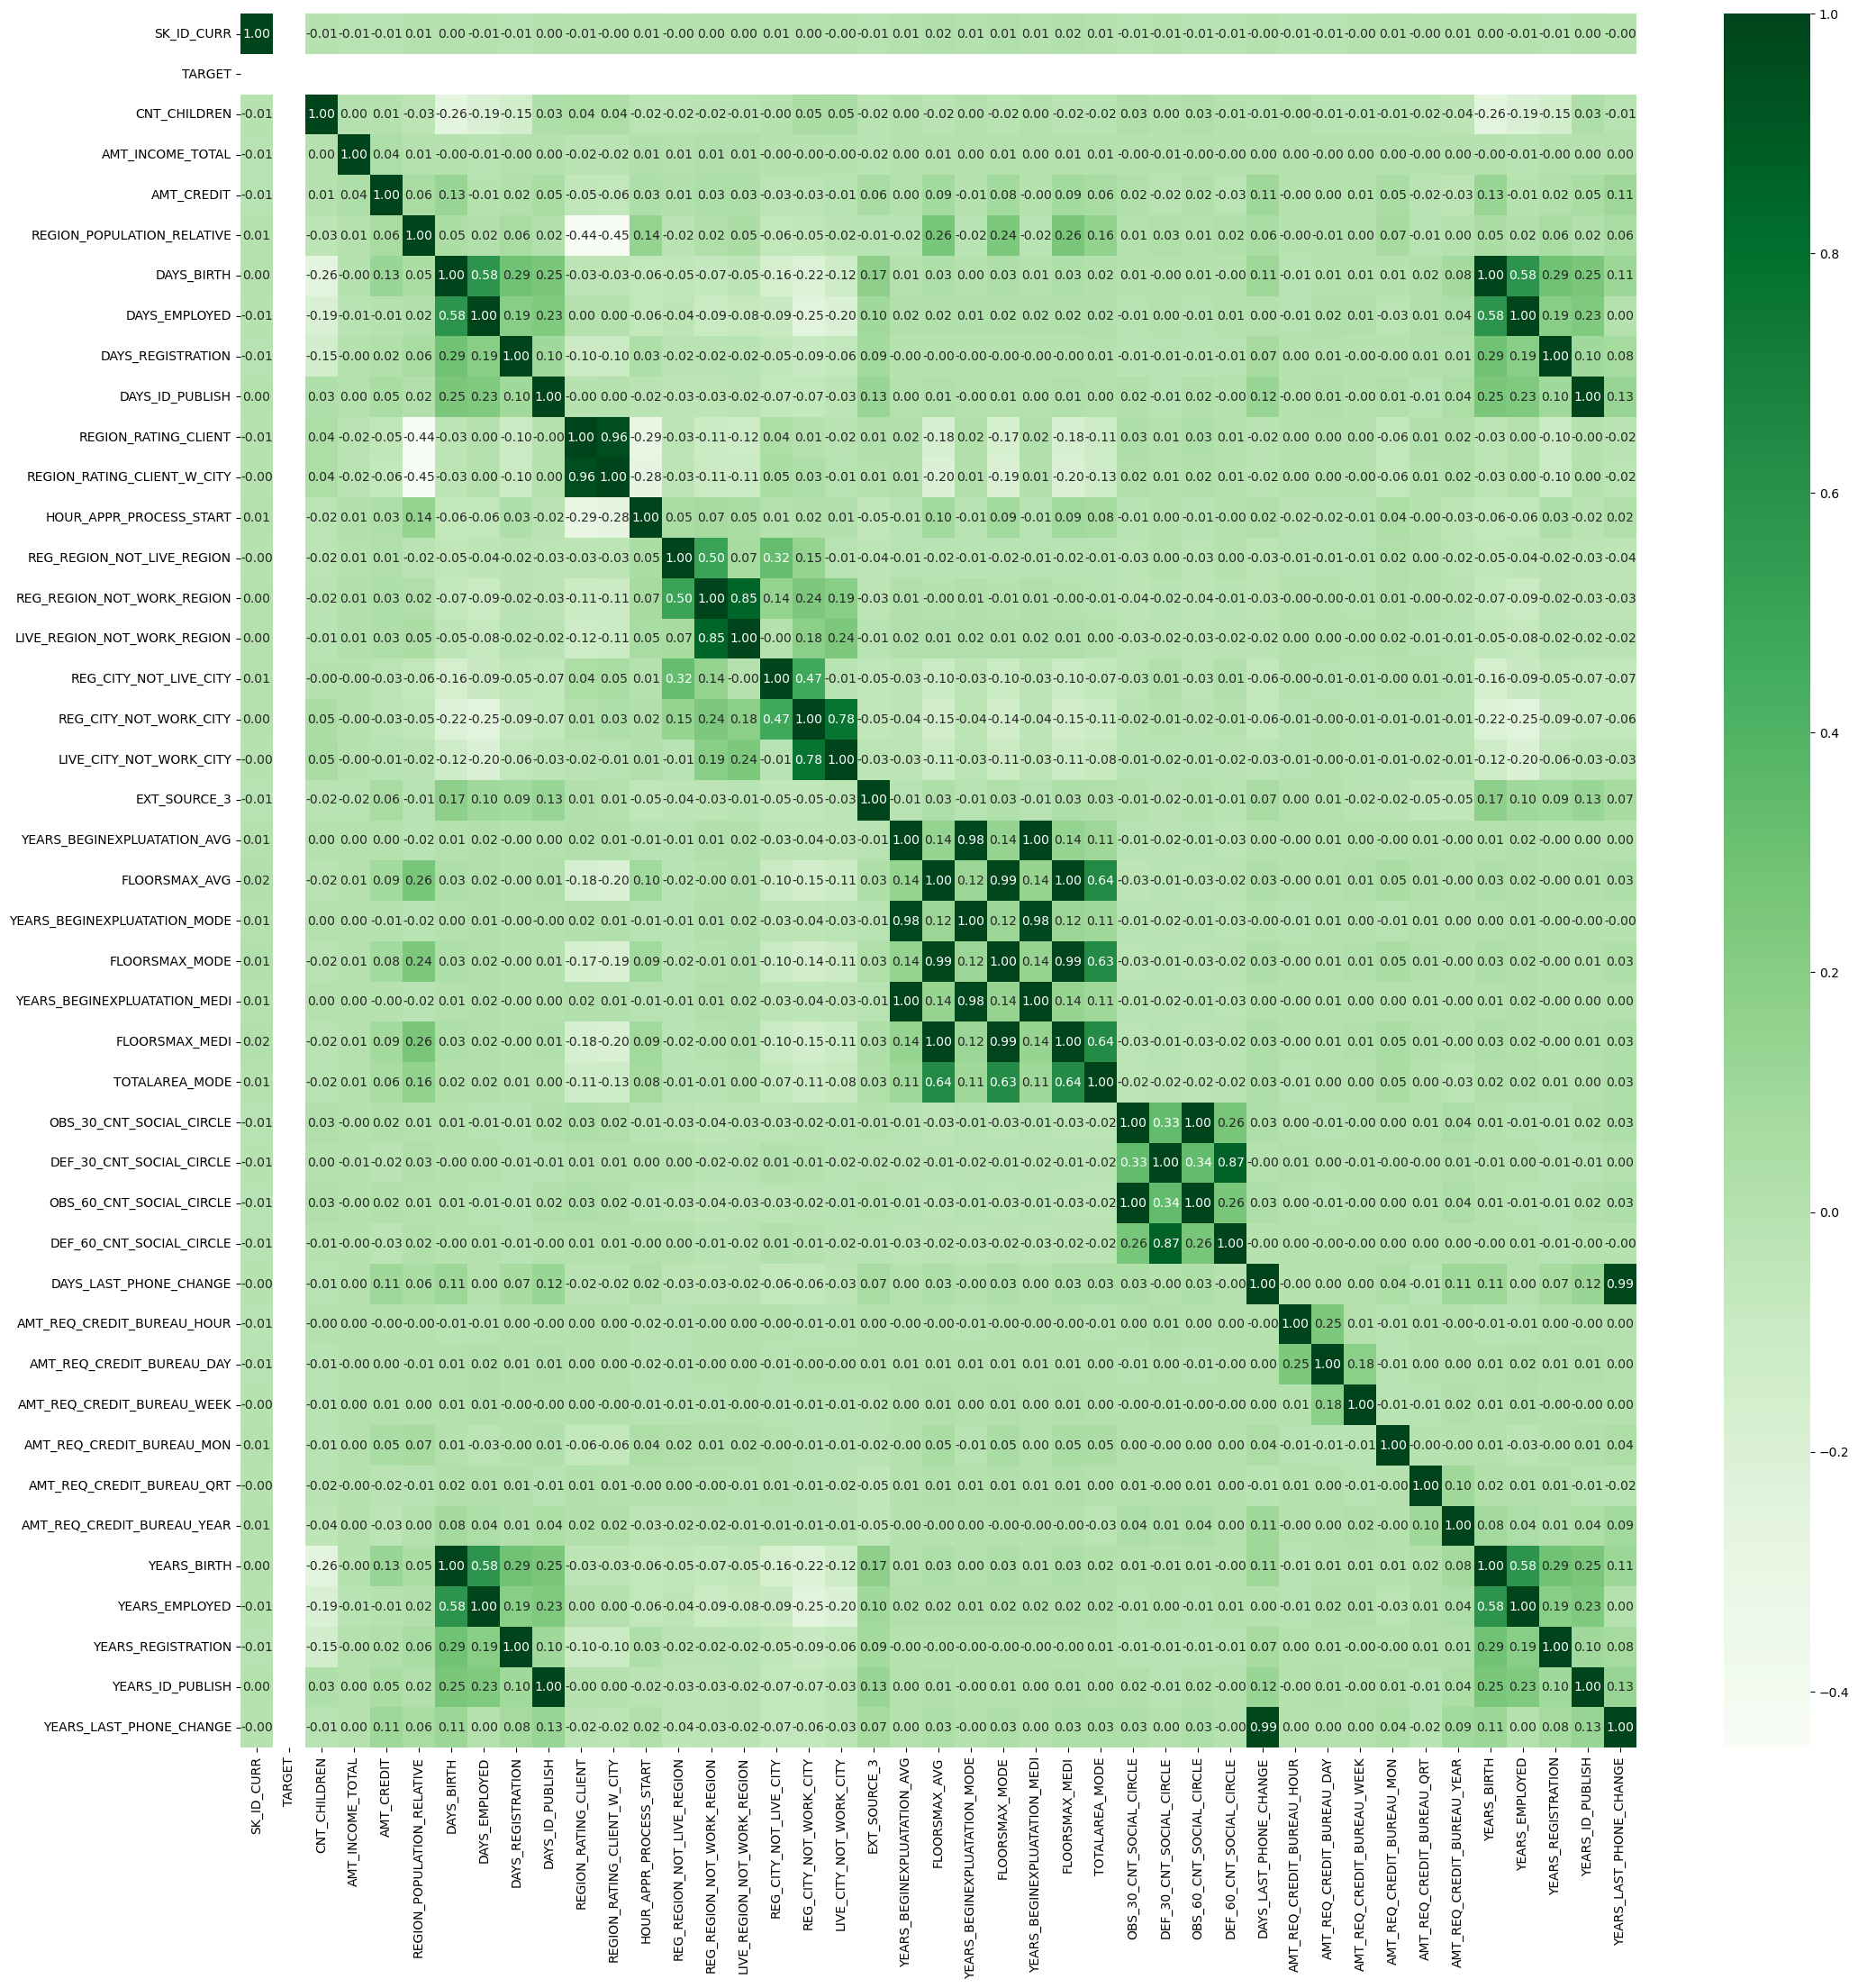

In [120]:
# creating a HeatMap to view the correlations above 80% and 99.99%
for i in application_df.columns:
    if i.startswith("FLAG"):
        application_df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [121]:
# getting top 10 correlations for Payment Difficulties


corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
YEARS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE          0.988086
DAYS_LAST_PHONE_CHANGE        YEARS_LAST_PHONE_CHANGE         0.988086
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978073
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE        0.868994
DEF_30_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        0.868994
REG_RE

<Figure size 1200x1000 with 0 Axes>

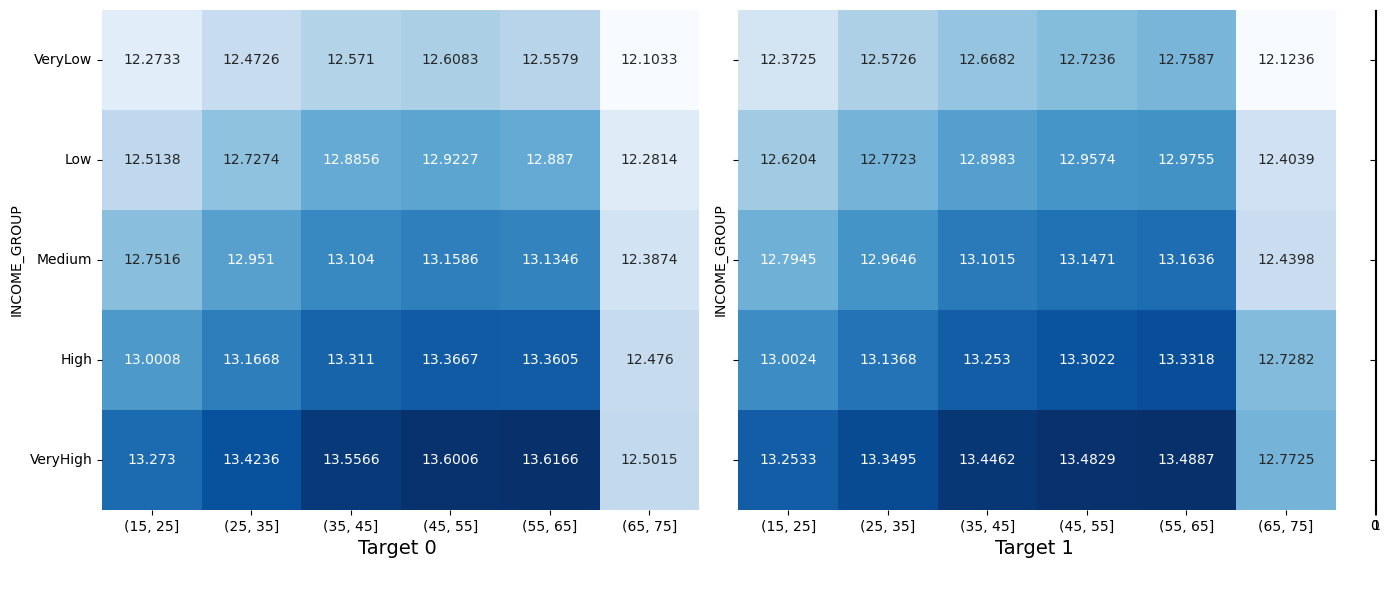

In [122]:
#Analysing relationship of AMT_CREDIT with AGE GROUP and income group


plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=df0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=df1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

In [ ]:
▣ Observations:

        ● Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in 
          loan book

## 6. Conclusion: Client categories to be targeted for providing loan

In [ ]:
        ● Clients in the age range 30-40 and 40-50
        ● Clients who are employed for more than 19 years
        ● Female clients who are working
        ● Clients who are Married
        ● Male clients with Academic degree
        ● Students and Businessman
        ● Repeater clients

# Pre-application analysis

In [123]:
# checking the top 5 rows
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# checking the bottom 5 rows
previous_df.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [126]:
# checking total no of rows and columns
previous_df.shape

(1670214, 37)

### Dealing with incorrect data types - Previous Application

In [127]:
# checking the info of the dataframe
previous_df.info(null_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [128]:
# checking the statistics summary of the dataframe
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [130]:
previous_df.isna().sum()/len(previous_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Removing columns with more than 35% null values

In [131]:
nullvalue = previous_df.isnull().sum()/len(previous_df)*100
nullvalue = nullvalue[nullvalue.values>35]
nullvalue = list(nullvalue.index)
previous_df.drop(labels=nullvalue, axis=1, inplace=True)
previous_df.isnull().sum()/len(previous_df)*100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

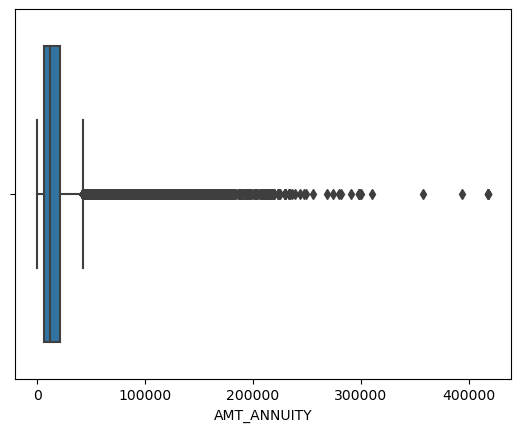

In [132]:
sns.boxplot(previous_df.AMT_ANNUITY)
previous_df.AMT_ANNUITY.fillna(previous_df.AMT_ANNUITY.median(), inplace=True)


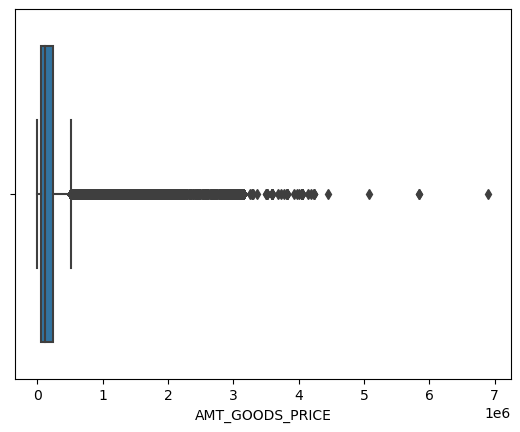

In [133]:
sns.boxplot(previous_df.AMT_GOODS_PRICE)
previous_df.AMT_GOODS_PRICE.fillna(previous_df.AMT_GOODS_PRICE.median(), inplace=True)

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64


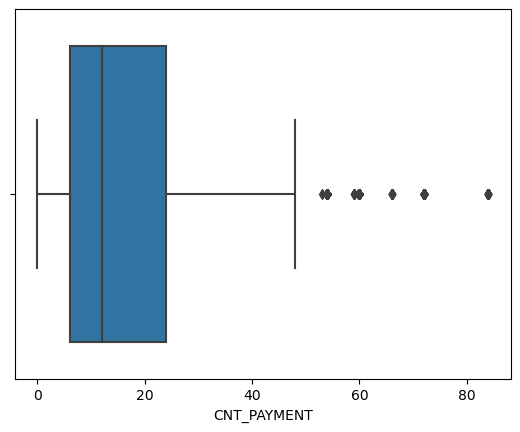

In [134]:
sns.boxplot(previous_df.CNT_PAYMENT)
print(previous_df.CNT_PAYMENT.value_counts().head())
previous_df.CNT_PAYMENT.fillna(previous_df.CNT_PAYMENT.median(), inplace=True)

In [135]:
previous_df.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [136]:
previous_df.PRODUCT_COMBINATION.fillna(previous_df.PRODUCT_COMBINATION.mode()[0], inplace=True)


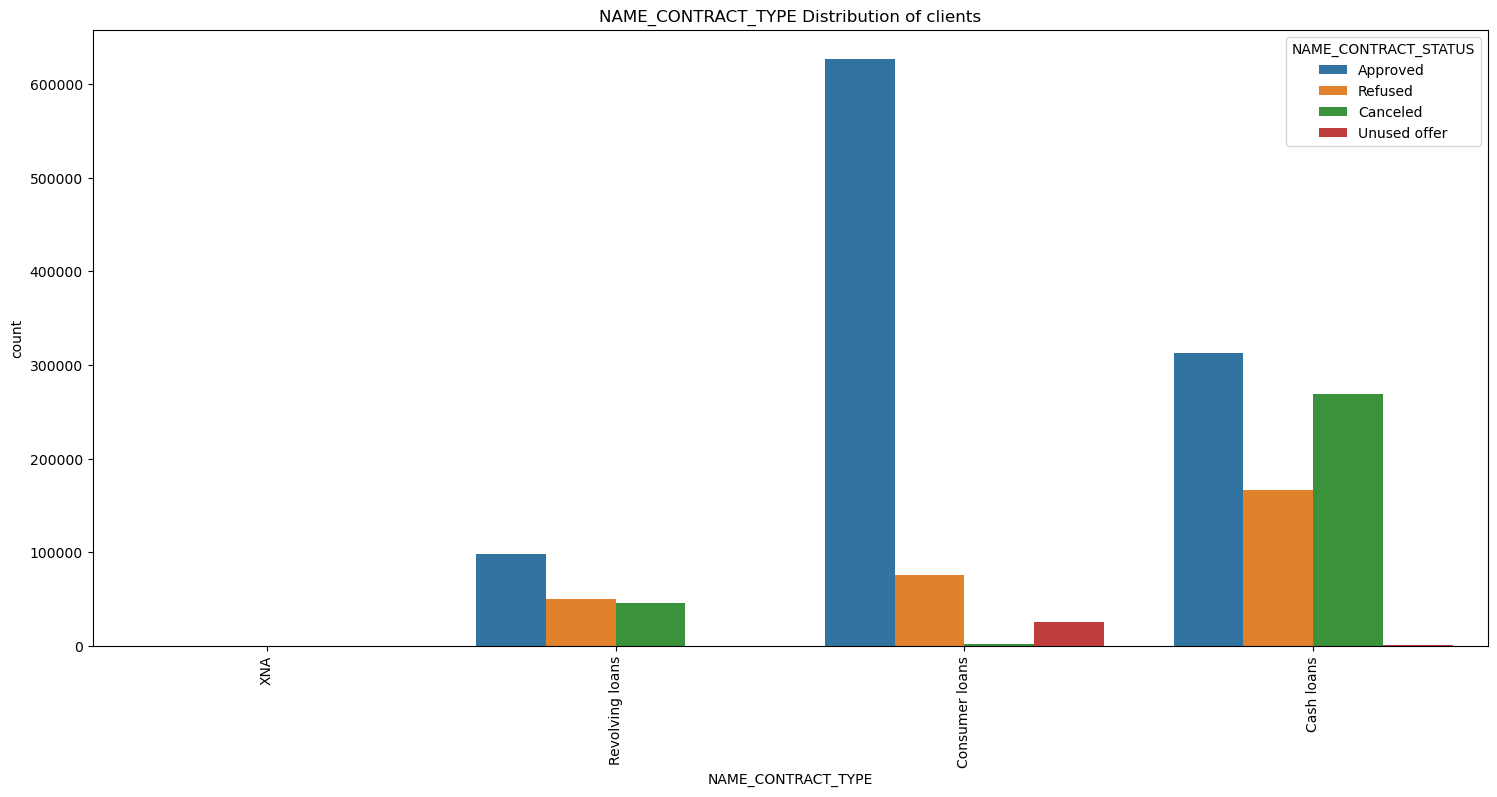

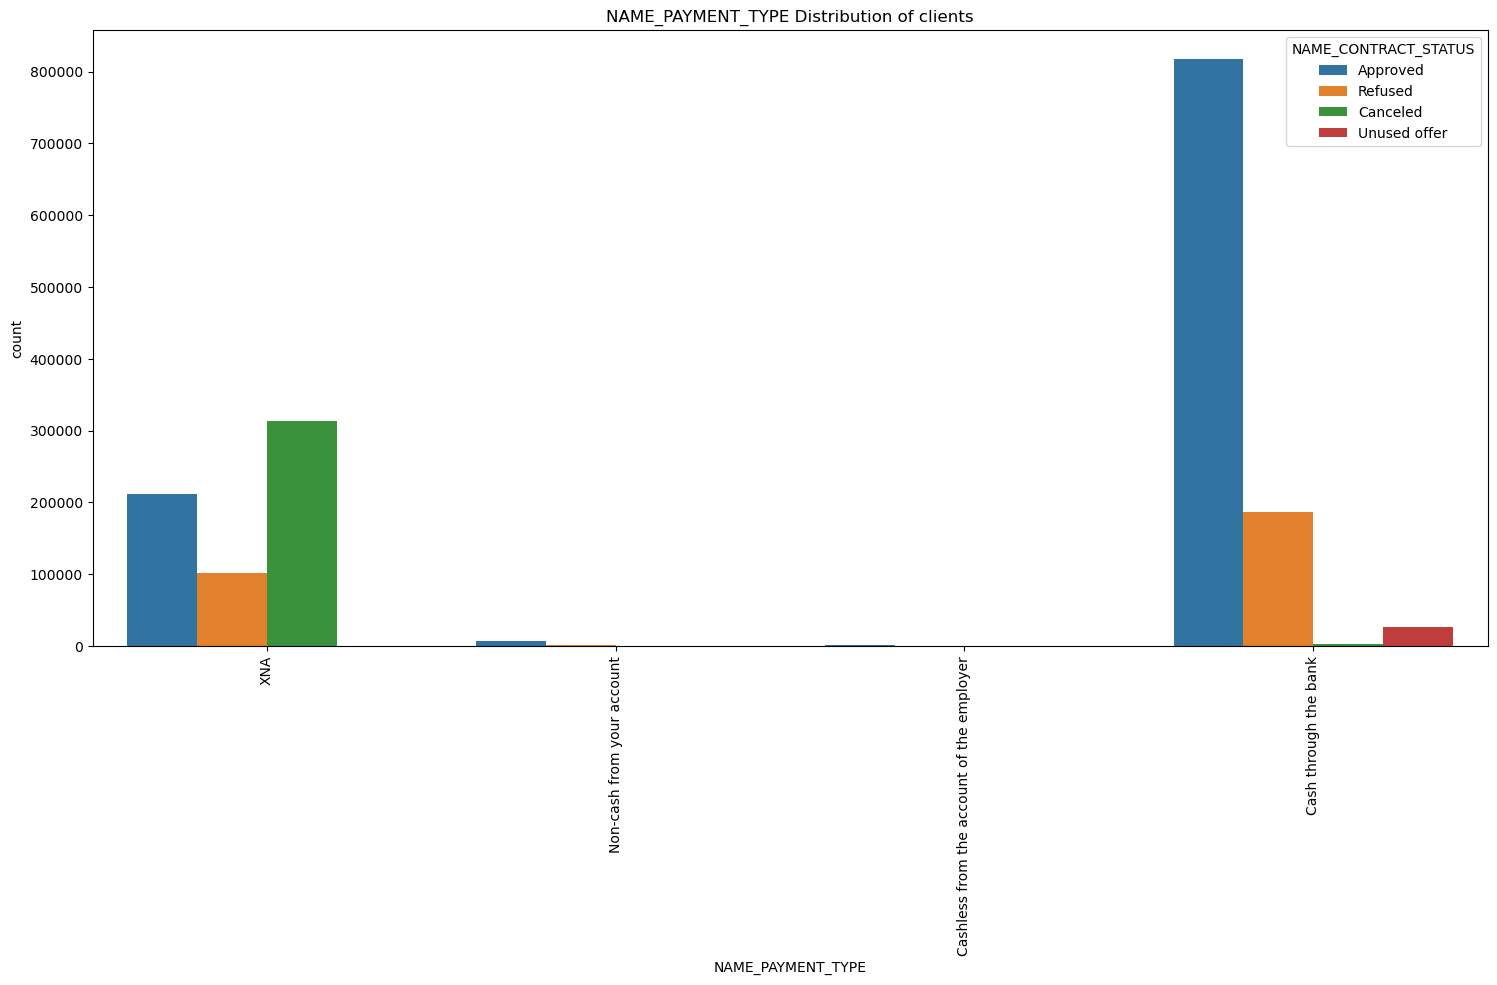

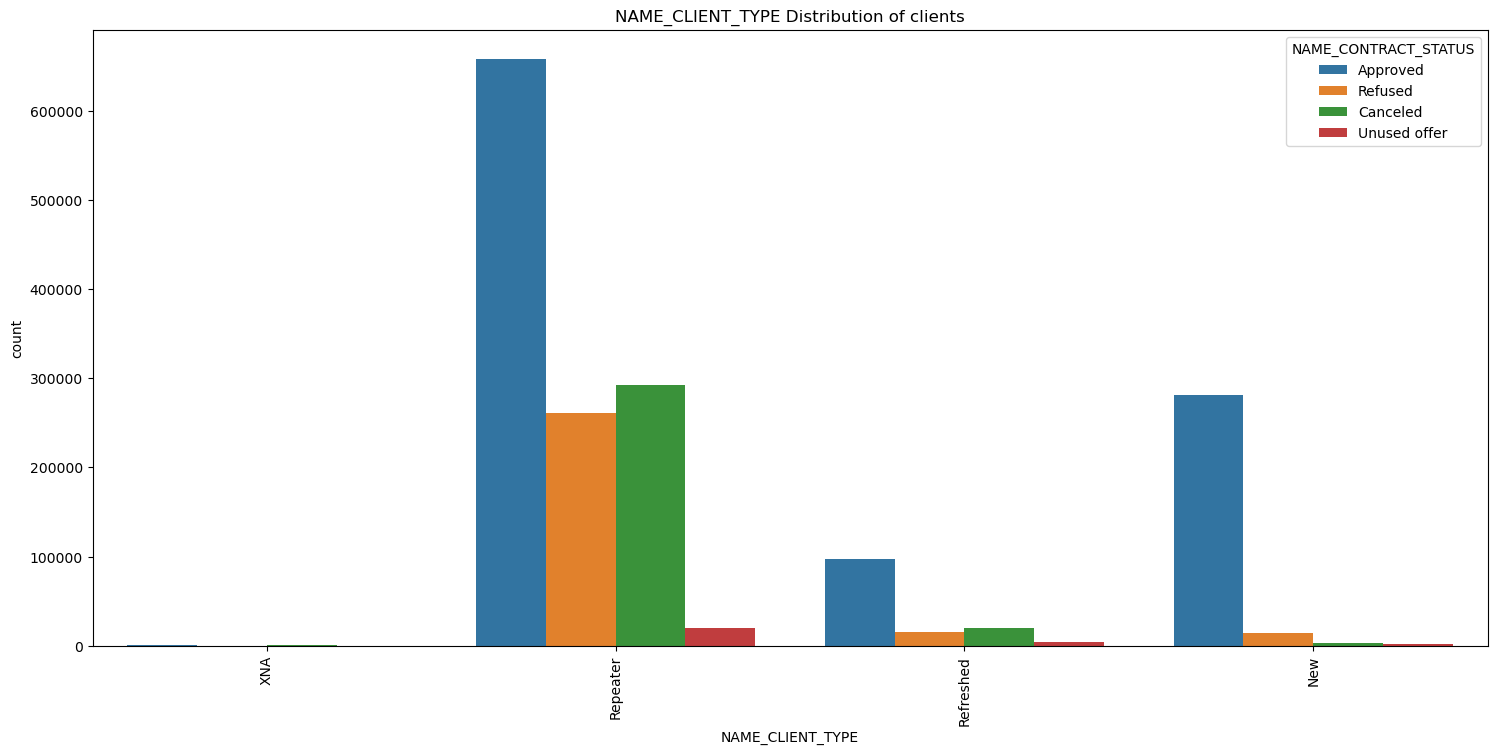

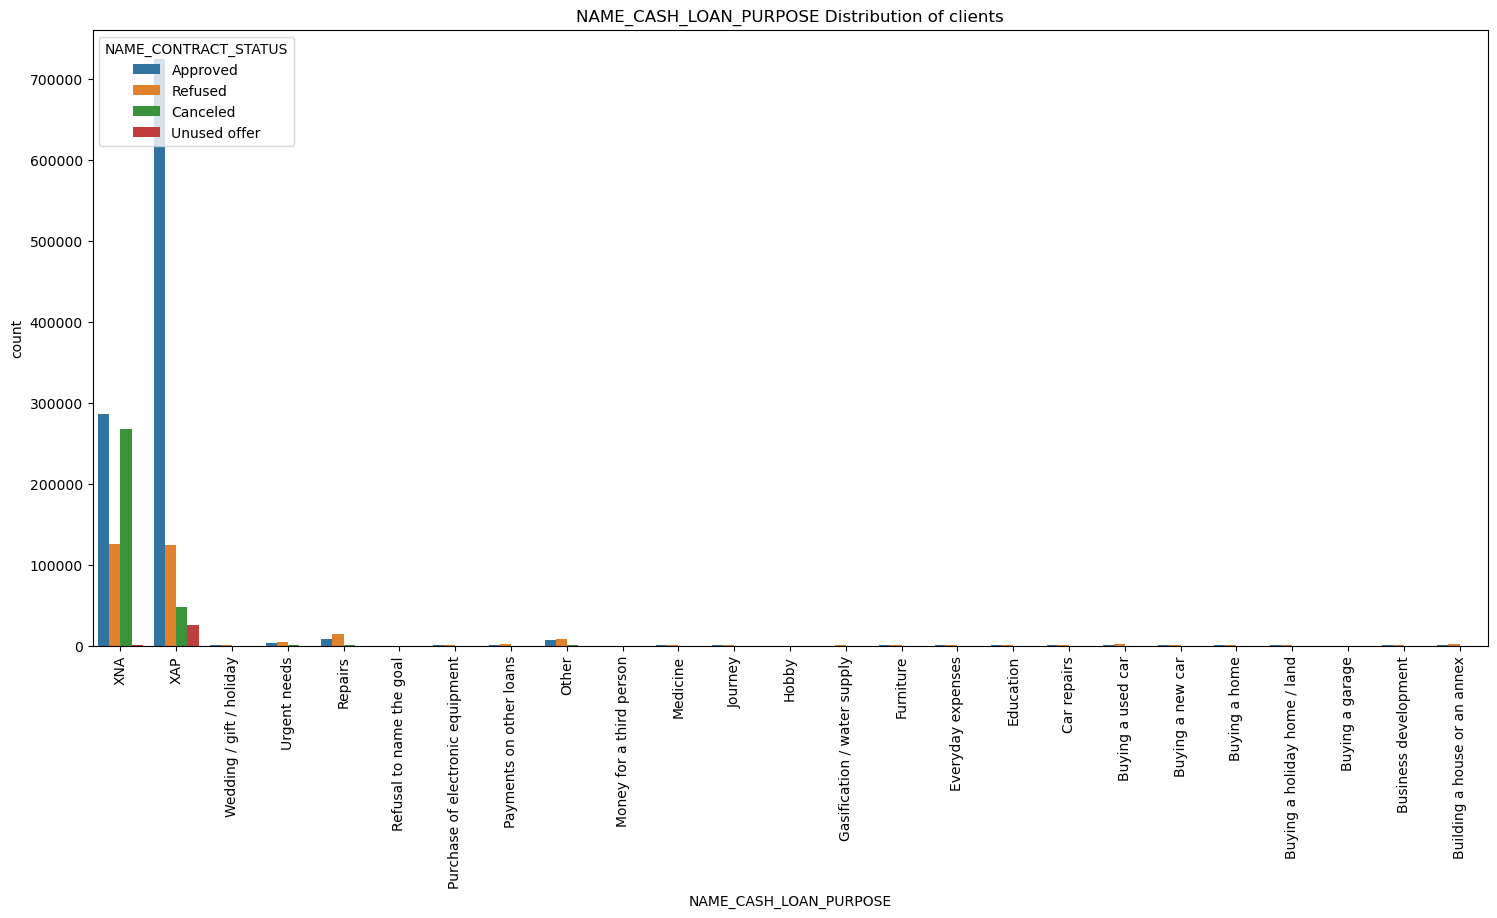

In [138]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.figure(figsize = [18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=previous_df, x =i, hue='NAME_CONTRACT_STATUS', order = sorted(previous_df[i].unique(), reverse = True))
    plt.xticks(rotation = 90)

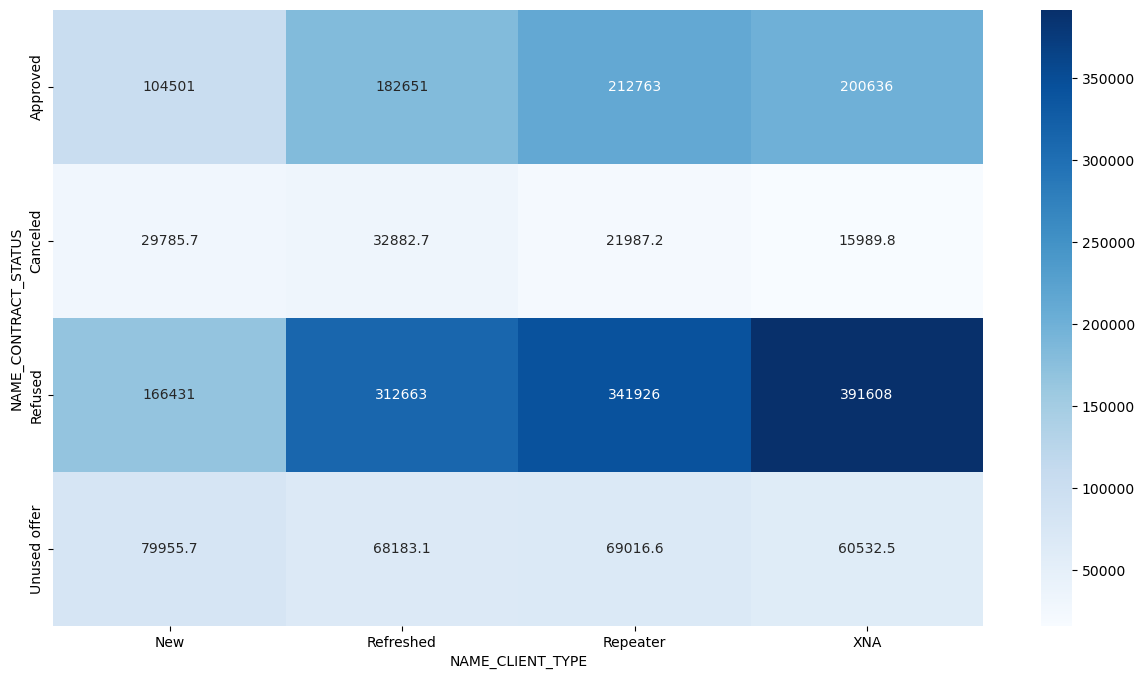

In [139]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=previous_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

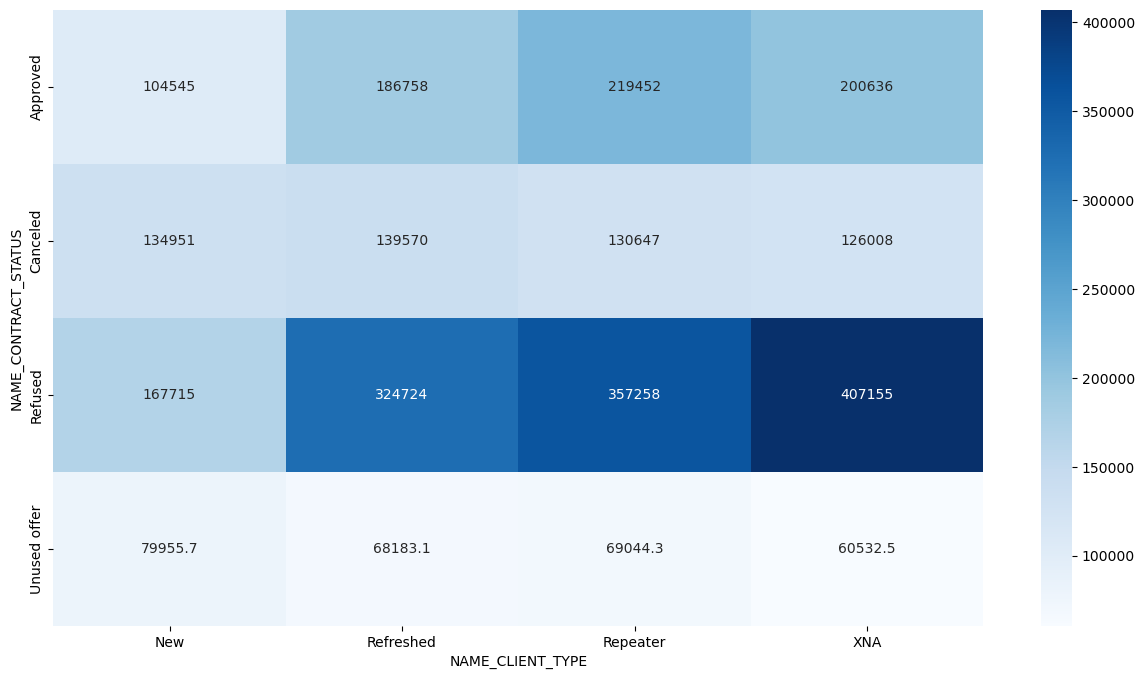

In [140]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=previous_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

## Summary

### Chances Of client Having Payment Difficulty